<a href="https://colab.research.google.com/github/sinhasagar507/toxic-comments/blob/preprocessing_v1/1_0_sinhasagar507_exploration1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Table of Contents**
---
- **A rule of thumb: All processes are iterative. Ad-hoc maneuvering between each of the steps may be required due to necessity**
- **Also, there is no one-size-fits-all kind of thing in ML. The sequence of preprocessing steps described below need to be adapted according to different situations**

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>

**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>
  
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Exploratory Data Analysis**](#Section7)<br>
**8.** [**Missing Value Imputation**](#Section8)<br>
**9.** [**Feature Selection**](#Section9)<br>

**10.** [**Post Data Processing**](#Section9)<br>
  - **10.1** [**Missing Value Imputation OR type-based feature cleaning**](#Section101)<br>
  - **10.2** [**Feature Selection**](#Section102)<br>
  - **10.3** [**Outlier Treatment**](#Section103)<br>
  - **10.4** [**Hypothesis Testing**](#Section104)<br>
  - **10.5** [**Feature Transformation**](#Section105)<br>
  - **10.6** [**Feature Extraction**](#Section106)<br>
  - **10.7** [**Data Resampling**](#Section107)<br>
  - **10.8** [**Feature Encoding**](#Section108)<br>
  
**11.** [**Modeling**](#Section11)<br>
  - **11.1** [**Basic ML Modeling**](#Section111)<br>
  - **11.2** [**Model Selection and Hyperparameter Tuning**](#Section112)<br>
  - **11.3** [**Model Validation**](#Section113)<br>
  - **11.4** [**Pipelining all the steps above, from fetching data to model validation**](#Section114)<br>
  
**12.** [**Development and Testing**](#Section12)<br>
  - **12.1** [**Development**](#Section121)<br>
  - **12.2** [**Testing**](#Section122)<br>
  
**13.** [**Model Deployment**](#Section13)<br>
  - **13.1** [**MLOPs Pipeline (Docker & Kubernetes)**](#Section131)<br>
  - **13.2** [**AWS Deployment**](#Section132)<br>

**14.** [**Conclusion**](#Section14)<br>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


---
<a name = Section1></a>
# **1. Introduction**
---

- Being anonymous over the internet can sometimes make people say nasty things that they normally would not in real life.

- Often, online platforms struggle to effectively facilitate conversations, leading many communities to limit or completely shut down user comments.

- To combat this issue, the <a href="https://conversationai.github.io/">Conversation AI team</a>, a research initiative founded by <a href="https://jigsaw.google.com/">Jigsaw</a> and Google (both a part of <a href="https://abc.xyz/">Alphabet</a>) are working on tools to help improve online conversation. One area of focus is the study of **negative online behaviors**, like **toxic comments** (i.e. comments that are rude, disrespectful or otherwise likely to make someone leave a discussion).

<center><img width="50%" src="https://miro.medium.com/v2/resize:fit:679/1*r5OBabkQnYD1D4yzC_kvLQ.gif"></center>

- So far they have built a range of publicly available models served through the <a href = "https://perspectiveapi.com/">Perspective API</a>, including toxicity. But the current models still make errors, and they don’t allow users to select which types of toxicity they’re interested in finding (e.g. some platforms may be fine with profanity, but not with other types of toxic content)

---
<a name = Section2></a>
# **2. Problem Statement**
---

- In this project, the task is to build a **multi-headed classification model** that's capable of detecting different types of toxicity like threats, obscenity, insults, and identity-based hate better than Perspective's   <a href="https://github.com/conversationai/unintended-ml-bias-analysis">current models</a>.
  
- Let's say you have been assigned the particular task...How would you proceed about it?

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install ydata-profiling                                  # Library to generate basic statistics about data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e5e36bb272509a5d879914405facb1f0bb854af2e713206b14dae7847281c987
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b

In [ ]:
!pip install nltk                                       # Natural Language Toolkit
!python -m spacy download en_core_web_md                # Spacy NLP

2024-01-21 18:50:58.883575: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 18:50:58.883683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 18:50:58.888239: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 18:50:58.909259: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 18:51:01.162404: W tensorflow/compiler/tf2

In [ ]:
!pip install torch-summary                              # Pytorch summary

In [ ]:
!pip install contractions>0.0.18       # Resolve contractions, for instance, you're -> you are

In [ ]:
# Vader Sentiment Analyzer
!pip install vaderSentiment           # Analyze sentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Language detection in Python
!pip install langdetect                # Language detection in Python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=92ae2daaf27a1c3acb6dc00067205496905de5f556de74e87dda1bcecd17bb50
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
# Fasttext language detection
!pip install fasttext-langdetect

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext-langdetect: filename=fasttext_langdetect-1.0.5-py3-none-any.whl size=7502 sha256=89125cbcb36fde1ff268922f8110e24047dc0719433e49075cb14ea1f0009cd5
  Stored in directory: /root/.cache/pip/wheels/e6/5b/5d/47e2fd5c2ff1028722739ce35f365e8f6eeb89ec97aa63e621
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199776 sha256=fa8ae93b236027b75603ad35ee8d1ee75bc914243f28cf64b655d7b2b62822bf
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext-langdetect fasttext


In [ ]:
# Upgrade all libraries at once
!pip install --upgrade --upgrade-strategy eager pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install wordcloud

In [ ]:
!pip install matplotlib-venn

In [ ]:
## System Version Check
import sys
print(f"Latest Python Version on Kaggle: {sys.version}")

Latest Python Version on Kaggle: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Import necessary libraries
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Object serialization
import pickle
import joblib
import sklearn

# WordCloud
from wordcloud import WordCloud, STOPWORDS

# Data Visualization
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Pandas pre-profiling
from ydata_profiling import ProfileReport

# Import Natural Language Processing (NLP) libraries
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

# Import Spacy for advanced natural language processing
import spacy

# Fasttext languae detection
from ftlangdetect import detect

# Contractions
import contractions as cm

# Import langdetect for language detection
# Note: set seed=0 to enforce consistent results (to be done later)
from langdetect import DetectorFactory, detect

# Import scikit-learn utilities
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

# Import Spacy tokenizer
from spacy.tokenizer import Tokenizer

# Import transformers for handling pretrained models
import transformers

# Import PyTorch for deep learning
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F

# Import torchsummary for model summary
from torchsummary import summary

# Import tqdm for progress bars
from tqdm import tqdm

# Chi2 test
from scipy.stats import chi2_contingency

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Initializing random generators for models
# Set a seed value
seed_value= 12321

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `pytorch` pseudo-random generator at a fixed value
torch.manual_seed(seed_value)

In [ ]:
# Initialize the constants
porter_stem = PorterStemmer()
wordnet_lemma = WordNetLemmatizer()
eng_stopwords = set(stopwords.words("english"))

In [ ]:
!python -m nltk.downloader wordnet
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /root/nltk_data/corpora/wordnet.zip
   creating: /root/nltk_data/corpora/wordnet/
  inflating: /root/nltk_data/corpora/wordnet/lexnames  
  inflating: /root/nltk_data/corpora/wordnet/data.verb  
  inflating: /root/nltk_data/corpora/wordnet/index.adv  
  inflating: /root/nltk_data/corpora/wordnet/adv.exc  
  inflating: /root/nltk_data/corpora/wordnet/index.verb  
  inflating: /root/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /root/nltk_data/corpora/wordnet/data.adj  
  inflating: /root/nltk_data/corpora/wordnet/index.adj  
  inflating: /root/nltk_data/corpora/wordnet/LICENSE  
  inflating: /root/nltk_data/corpora/wordnet/c

In [ ]:
# Check versions of all tertiary packages
print(f"Sklearn: {sklearn.__version__}")
print(f"Matplotlib: {mp.__version__}")

Sklearn: 1.2.2
Matplotlib: 3.7.1


In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Lemmatizer = WordNetLemmatizer()
print("words :", Lemmatizer.lemmatize("words"))
print("corpora :", Lemmatizer.lemmatize("corpra"))

# a denotes adjective in "pos"
print("better :", Lemmatizer.lemmatize("better", pos ="a"))

words : word
corpora : corpra
better : good


In [ ]:
from textblob import TextBlob

In [ ]:
wiki = TextBlob("Python is a high-level, general-purpose programming language.")
wiki.tags

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('high-level', 'JJ'),
 ('general-purpose', 'JJ'),
 ('programming', 'NN'),
 ('language', 'NN')]

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import Word
w = Word("Hello there!!!")
w.lemmatize()

'Hello there!!!'

In [ ]:
!python -m spacy download en_core_web_md

2024-01-21 19:01:43.837599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 19:01:43.837660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 19:01:43.839511: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 19:01:45.256472: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")

doc = nlp(u"The shimmering azure waters lapped gently against the golden sands, painting a serene picture of tranquility under the midday sun. A gentle breeze carried the faint scent of salt and sea spray, mingling with the crisp, clean air. Seabirds soared overhead, their graceful arcs cutting through the vast expanse of the sky. Along the coastline, a cluster of cottages nestled among verdant trees, their vibrant colors standing out against the backdrop of lush foliage. Laughter and joyous chatter filled the air as families enjoyed their day by the shore, building sandcastles and playing in the surf. Farther out, sailboats dotted the horizon, their billowing sails catching the ocean's whispers, inviting adventurers to explore the endless mysteries hidden beyond the horizon.")

for token in doc:
    print(token.lemma_)

the
shimmer
azure
water
lap
gently
against
the
golden
sand
,
paint
a
serene
picture
of
tranquility
under
the
midday
sun
.
a
gentle
breeze
carry
the
faint
scent
of
salt
and
sea
spray
,
mingle
with
the
crisp
,
clean
air
.
seabird
soar
overhead
,
their
graceful
arcs
cut
through
the
vast
expanse
of
the
sky
.
along
the
coastline
,
a
cluster
of
cottage
nestle
among
verdant
tree
,
their
vibrant
color
stand
out
against
the
backdrop
of
lush
foliage
.
laughter
and
joyous
chatter
fill
the
air
as
family
enjoy
their
day
by
the
shore
,
build
sandcastle
and
play
in
the
surf
.
far
out
,
sailboat
dot
the
horizon
,
their
billowing
sail
catch
the
ocean
's
whisper
,
invite
adventurer
to
explore
the
endless
mystery
hide
beyond
the
horizon
.


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of comments and its classification into six categories of toxic, severely toxic, obscene, threat, insult and identity hate

| Records(train+test)| Features |  Size(total) |
| :--: | :--: | :--: |
| 312735 | 2 | 49.78 MB |

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--|
|1| Id | A unique identifier for a particular comment |
|2| comment_text | Contains comments taken from Wikipedia talk page edit discussions |


| # | Label Name | Label Description |
|:--:|:--|:--|
|1| toxic| A rude, disrespectful, or unreasonable comment that is likely to make people leave a discussion |
|2| severely_toxic | A very hateful, aggressive, disrespectful comment or otherwise very likely to make a user leave a discussion or give up on sharing their perspective. This attribute is much less sensitive to more mild forms of toxicity, such as comments that include positive uses of curse words. |
|3| obscene | Swear words, curse words, or other obscene or profane language. |
|4| threat | Describes an intention to inflict pain, injury, or violence against an individual or group.|
|5| insult | Insulting, inflammatory, or negative comment towards a person or a group of people. |
|6| identity_hate |	Negative or hateful comments targeting someone because of their identity. |

In [ ]:
train_path = "/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /train.csv.zip"
test_path = "/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /test.csv.zip"

In [ ]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
def get_file_size(file_path: str):
    """Get the size of the file in bytes"""
    try:
        size_bytes = os.path.getsize(file_path)
        return size_bytes
    except OSError:
        print("No path exists at the given location")

In [ ]:
train_file_memory = get_file_size(train_path)
test_file_memory = get_file_size(test_path)
total_memory = (train_file_memory+test_file_memory)

# Print the total memory usage
print(f'Total File Size: {total_memory / (1024 * 1024):.2f} MB')

Total File Size: 49.78 MB


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observations**
- The **mean** of all label values seem to be significantly less than 0.5, thereby creating the case of an **imbalanced dataset**
- All labels are **binary**, i.e., either 0 or 1

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
def prelim_clean(df):
  df = df.drop_duplicates() # Drop duplicate data, if any
  df = df.T.drop_duplicates().T # Drop duplicate columns
  return df

def prelim_inspection(df):
  """Inspects the first few rows/columns of data"""
  display(df.head()) # look at data
  display(df.shape)  # look a shape of data
  display(df.iloc[:5, :5].dtypes)  # look at data types. Ideally look at all rows. Only look at first five here for minimal output
  display(df.isna().any())
  display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

def null_values(df):
  """Checks for null values within the dataset"""
  missing_vals = df.isnull().sum().sort_values(ascending=False)
  missing_perc = ((df.isnull().sum())/len(df) * 100).sort_values(ascending=False)
  return missing_vals, missing_perc

In [ ]:
from time import time
t1 = time()
train_df = prelim_clean(train_df)
prelim_inspection(train_df)
null_values(train_df)
print(f"Total time taken for cell to run: {time()-t1}")

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


(159571, 8)

id              object
comment_text    object
toxic           object
severe_toxic    object
obscene         object
dtype: object

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571,159571,159571,159571,159571,159571,159571,159571
unique,159571,159571,2,2,2,2,2,2
top,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
freq,1,1,144277,157976,151122,159093,151694,158166


Total time taken for cell to run: 57.66911172866821


In [ ]:
t2 = time()
test_df = prelim_clean(test_df)
prelim_inspection(test_df)
null_values(test_df)
print(f"Total time taken for cell to run: {time()-t2}s")

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


(153164, 2)

id              object
comment_text    object
dtype: object

id              False
comment_text    False
dtype: bool

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


Total time taken for cell to run: 28.15150260925293s


**Observation(s)**
- There is only **comment_text** column as a **direct feature**. Other **discriminatory features** can    be derived from this feature
- There exist no **null values** in **comment_text** column
- There seem to be no **duplicate** rows in the dataset as the size remains same as earlier

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---
- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

<a name = Section51></a>
### **5.1 Pre-Profiling Report**

In [ ]:
profile = ProfileReport(train_df, title="Profiling Report", html={"style": {"full_width": True}})
profile.to_file(output_file='Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observation(s)**
- There seems to be a strong relationship between
    - toxic with **obscene** and **insult**
    - obscene with **insult**
    - However, the correlation values are calculated using the pearrson method, which assumes a linear relationship between continuous variables. So, to find a pattern between two categorical variables we can use other tools like
        - Confusion Matrix/Crosstab
        - Cramer's V statistic
            - Cramer's V stat is an extension of the chi-square test where the extent/strength of     association is also measured
- All labels are severely imbalanced
        - toxic: 54.4%
        - severe_toxic: 91.9%
        - obscene: 70.1%
        - threat: 97.1%
        - insult: 71.6%
        - identity_hate: 92.7%

---
<a name = Section6></a>
# **6. Data Cleaning**
---

<a name = Section6></a>
- In this section, we will perform the **cleaning** operations over the features using information from the previous section.

- As a part of this project, we will employ data cleaning techniques such as working with only English text, remove special characters from the comment text, etc. *and other useful linguistic features such as **n-grams, text length, keywords, topics** etc...check this out*

- To Do
    - Add Unit Testing
    - Assertion AND further "is instance()" checks
- Order of cleaning is also important

- To Remove
    - All numbers
    - then extra dots which occur
    - Eg: 89.205.38.27 which follows a word
    - Extra spaces and backslashes
    - Extra "\n"
    - lowercase
    - just use the standard stopwords for removal
    - remove all numbers:
    - Remove all nbsp
    - Whatever I brainstorm and comes to my mind and how I have proceeded just jot it down

In [ ]:
# Load a Spacy Pipeline
nlp = spacy.load("en_core_web_md")

In [ ]:
# Function to detect language using langdetect
## Check if I have to perform sentence level tokenization first

def detect_language(text: str) -> str:
    """
    Detect the language of the given text using langdetect library.

    Parameters:
    - text (str): The input text for language detection.

    Returns:
    - str: The detected language code (e.g., 'en' for English).
           If language detection fails, returns 'unknown'.
    """
    try:
        # Attempt to detect the language using langdetect
        return detect(text)["lang"]
    except Exception:
        # Return 'unknown' if language detection fails
        return "unknown"

# Capture the hashtags and/or usertags if any
def extract_hashtags(text: str) -> list:
    """ Returns all Twitter hashtags from the text"""
    hashtags_ls = re.findall("#\w+", text)
    return hashtags_ls

# Clean comment text
def clean_text(
        text, words=True, stops=True, urls=True, tags=True,
        newLine=True, ellipsis=True, special_chars=True, condensed=True, non_breaking_space=True,
        character_encodings=True, stopwords=True, only_words=True) -> str:

    """ Clean tweets after extracting all hashtags and username tags
    Not comprehensive enough to capture all idiosyncrasies, but works for most of the time
    """

    # Capture only words and no numbers
    if words:
        pattern = r"\d"
        text = re.sub(pattern, "", text)

    # Remove more than or equal to 2 full stops
    if stops:
        pattern = r"\.{2,}"
        text = re.sub(pattern, "", text)

    # Remove URLs
    if urls:
        pattern = "(https\:)*\/*\/*(www\.)?(\w+)(\.\w+)\/*\w*"
        text = re.sub(pattern, "", text)

    # Remove tags
    if tags:
        text = re.sub("@\w+", "", text)

    # Replacing one or more occurrences of '\n' with ''
    # Replacing multiple occurrences, i.e., >=2 occurrences with '.'
    if newLine:
        text = re.sub("\n+", "", text)

    # Fix contractions
    if condensed:
        try:
            text = cm.fix(text)
        except:
            print(text)

    # Remove "ellipsis"
    if ellipsis:
        pattern = r"\.{2,}"
        text = re.sub(pattern, "", text)

    # Remove the special_chars list: [%, ^, *, -, _, +, =, |, \, /, ?]
    if special_chars:
        spec_char_list = ['%', '^', '*', '-', '_', '+', '=', '|', '/', '?']
        new_sent_tokens = []

        for character in text:
            if str(character) not in spec_char_list:
                new_sent_tokens.append(character)

        sent = " ".join(new_sent_tokens)
        sent = text.strip() # Add further checks for cleaning

    # Resolve character encodings
    if character_encodings:
        pattern = r"â|€|¦|â|€˜|€™"
        text = re.sub(pattern, "", text)

    # Remove non-breaking space
    if non_breaking_space:
        pattern = r"(\xa0|&nbsp)"
        text = re.sub(pattern, "", text)

    # Remove stopwords
    if stopwords:
        words = word_tokenize(text)
        filtered_words = [word for word in words if word not in eng_stopwords]
        text = " ".join(words)
        text = text.strip()  # Add further checks for cleaning

    # Only words
    if only_words:
        text = re.sub(r"[^\w\n\.]+", " ", text)
        text = text.strip()

    # data = data.progress_apply(clean_workers)
    # Limiting length of tweet. Do this processing later. Not in first stage
    # max_tokens = 50
    # min_tokens = 5
    # data = data.progress_apply(limit_length, min_tokens=min_tokens, max_tokens=max_tokens)

    # Dropping all NaN values, which are the token limits that didn't meet the thresholding requirements
    # data = data.dropna()
    # print(f"Limited each tweet to a max. of {max_tokens} tokens and min of {min_tokens} tokens. Shape is now {data.shape}.\n \n. Peek: \n {data.head()}")
    # visualize_lengths(data, "Lengths of tokens after step 10")

    return text

<a name = Section7></a>

---
# **7. Exploratory Data Analysis**
---

- Association between labels (Correlation)
- Distribution of comment lengths
- Understanding the topics behind "toxic" comments
    - https://www.kaggle.com/code/jagangupta/understanding-the-topic-of-toxicity
- Extracting **syntactic features** in text
- Treating data imbalance
    - Deep Learning Models
- Metric Evaluation (Mean AUC score)
- Clustering of topics

- In this section, we will perform the **cleaning** operations over the features using information from the previous section.

- As a part of this project, we will employ data cleaning techniques such as working with only English text, remove special characters from the comment text, etc. *and other useful linguistic features such as **n-grams, text length, keywords, topics** etc...check this out*

- To Do
    - Add Unit Testing
    - Assertion AND further "is instance()" checks
- Order of cleaning is also important

- To Remove
    - All numbers
    - then extra dots which occur
    - Eg: 89.205.38.27 which follows a word
    - Extra spaces and backslashes
    - Extra "\n"
    - lowercase
    - just use the standard stopwords for removal
    - remove all numbers:
    - Remove all nbsp
    - Whatever I brainstorm and comes to my mind and how I have proceeded just jot it down

**TODO**
- Convert everything to lowercase and remove multiple occurences of some repeating characters

In [ ]:
# import spacy
# nlp = spacy.load("en_core_web_md")

# doc = nlp(u"The shimmering azure waters lapped gently against the golden sands, painting a serene picture of tranquility under the midday sun. A gentle breeze carried the faint scent of salt and sea spray, mingling with the crisp, clean air. Seabirds soared overhead, their graceful arcs cutting through the vast expanse of the sky. Along the coastline, a cluster of cottages nestled among verdant trees, their vibrant colors standing out against the backdrop of lush foliage. Laughter and joyous chatter filled the air as families enjoyed their day by the shore, building sandcastles and playing in the surf. Farther out, sailboats dotted the horizon, their billowing sails catching the ocean's whispers, inviting adventurers to explore the endless mysteries hidden beyond the horizon.")

# for token in doc:
#     print(token.lemma_ for token in doc)

In [ ]:
test_df["comment_text"][50]

'I have been perfectly civil in what quite clearly idiotic trolling.'

In [ ]:
clean_text(test_df["comment_text"][50])

'I have been perfectly civil in what quite clearly idiotic trolling .'

In [ ]:
print(detect_language("I am a guy."))

unknown


In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# Tried applying language identification earlier, however most of them were goinf unidentified
train_df["lang"] = train_df["comment_text"].progress_apply(detect_language)
test_df["lang"] = test_df["comment_text"].progress_apply(detect_language)
train_df.sample(20)

100%|██████████| 153164/153164 [19:38<00:00, 129.98it/s]


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,lang
70291,bc0ab9ae566f19c1,"""\n You have a foreign terminology. A NAP cons...",0,0,0,0,0,0,unknown
135984,d75dad31c00b94ed,"""\n\n User:Alien3 thinks I'm edit warring... \...",0,0,0,0,0,0,unknown
83735,e01a70cfd80dac7f,I do think that is heavily biased and that ac...,1,0,0,0,0,0,unknown
141177,f36374af17471824,THE FUKKING RETARDO RACISTO KANUCK,1,1,1,0,1,1,unknown
87866,eb0f02fa49f9e022,"Warning \n\nYou have created about 5 Etnas, (W...",0,0,0,0,0,0,unknown
126097,a25f378931612a4d,". And Kuru, you are wrong, if we go by whats i...",0,0,0,0,0,0,unknown
19773,343bbec85a71231c,ASAP Mob's singles \n\nShould we add ASAP Mob'...,0,0,0,0,0,0,unknown
80299,d6cfd91eb5d4d8ff,"Welcome!\n\nHello, , and welcome to Wikipedia!...",0,0,0,0,0,0,unknown
146219,28f8a63d4146749b,""":The Michael Jackson post was simply a result...",0,0,0,0,0,0,unknown
144080,0788d4cf327a315a,", 8 February 2011 (UTC)\nI only mention his co...",0,0,0,0,0,0,unknown


In [ ]:
train_df["hashtags"] = train_df["comment_text"].apply(extract_hashtags)
test_df["hashtags"] = test_df["comment_text"].apply(extract_hashtags)

In [ ]:
train_df["hashtags"].sample(30)

70291     []
135984    []
83735     []
141177    []
87866     []
126097    []
19773     []
80299     []
146219    []
144080    []
156738    []
57421     []
20376     []
126822    []
50945     []
116122    []
40454     []
118728    []
25376     []
26183     []
23526     []
116329    []
124945    []
39624     []
50596     []
97740     []
35627     []
157020    []
129833    []
17137     []
Name: hashtags, dtype: object

In [ ]:
train_df["comment_text"] = train_df["comment_text"].apply(clean_text)

In [ ]:
test_df["comment_text"] = test_df["comment_text"].apply(clean_text)

SAYIN EDİTÖR, LÜTFEN BENİM DIŞIMDA BU SAYFADA HİÇ KİMSE DEĞİŞİKLİK YAPAMASIN. BAZI DEĞİŞİKLİKLER BENİM DIŞIMDA YAPILMAKTADIR. Dursun Özden
== YA ALLAH XUDAYA BYTYN DYNYA HÖKMƏTLƏRİNƏ AİLƏLƏRİNƏ DOGULASİ BALALARİNA NƏVƏLƏRİNƏ GURAN KƏƏBƏ ƏN MYGƏDDƏS OCAGLAR GƏNİM OLSUN ALLAH  ALLAH XUDAYA BYTYN DYNYA HÖKMƏTLƏRİNƏ AİLƏLƏRİNƏ DOGULASİ BALALARİNA NƏVƏ ==  YA ALLAH XUDAYA BYTYN DYNYA HÖKMƏTLƏRİNƏ AİLƏLƏRİNƏ DOGULASİ BALALARİNA NƏVƏLƏRİNƏ GURAN KƏƏBƏ ƏN MYGƏDDƏS OCAGLAR GƏNİM OLSUN ALLAH  ALLAH XUDAYA BYTYN DYNYA HÖKMƏTLƏRİNƏ AİLƏLƏRİNƏ DOGULASİ BALALARİNA NƏVƏLƏRİNƏ GURAN KƏƏBƏ ƏN MYGƏDDƏS OCAGLAR GƏNİM OLSUN ALLAH  ALLAH XUDAYA BYTYN DYNYA HÖKMƏTLƏRİNƏ AİLƏLƏRİNƏ DOGULASİ BALALARİNA NƏVƏLƏRİNƏ GURAN KƏƏBƏ ƏN MYGƏDDƏS OCAGLAR GƏNİM OLSUN ALLAH  ALLAH XUDAYA YUNESKAYA BMT NATOYA BYTYN DYNYAYA ƏN MYGƏDDƏS KYNLƏRDƏDƏ GURAN KƏƏBƏ ƏN MYGƏDDƏS OCAGLAR GƏNİM OLSUN ALLAH  XUDAYA YUNESKAYA BMT NATOYA GURAN KƏƏBƏ ƏN MYGƏDDƏS OCAGLAR GƏNİM OLSUN ALLAH  XUDAYA YUNESKAYA BMT NATOYA GURAN KƏƏBƏ ƏN MYGƏDD

In [ ]:
# Serialize train
# Serialize test

In [ ]:
# Select only those rows where the comment language is in "English"
train_df = train_df[train_df["lang"] == "en"]
test_df = test_df[test_df["lang"] == "en"]

In [ ]:
# Again check the dataset sizes
print(train_df.shape)
print(test_df.shape)

(0, 10)
(0, 4)


In [ ]:
# Serialize the dataframes so that the entire preprocessing step need not be run again
# Saving all my results
with open('train.pkl', 'wb') as handle:
    pickle.dump(train_df, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('test.pkl', 'wb') as handle:
    pickle.dump(test_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load serialized data
dtypes = {
        "toxic": "uint8",
        "severe_toxic": "uint8",
        "obscene": "uint8",
        "threat": "uint8",
        "insult": "uint8",
        "identity_hate": "uint8"
}
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
train_df = pd.read_pickle("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /train_v2.pkl.zip")
test_df = pd.read_pickle("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /test_v2.pkl.zip")
train_df = train_df.astype(dtypes)

In [ ]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,hashtags,lang,comment_length,tokenized_text
0,0000997932d777bf,ExplanationWhy the edits made under my usernam...,0,0,0,0,0,0,[],en,252,"[explanationwhy, the, edits, made, under, user..."
1,000103f0d9cfb60f,D aww He matches this background colour I am s...,0,0,0,0,0,0,[],en,93,"[aww, matches, this, background, colour, seemi..."
2,000113f07ec002fd,Hey man I am really not trying to edit war . I...,0,0,0,0,0,0,[],en,237,"[hey, man, really, not, trying, edit, war, jus..."
3,0001b41b1c6bb37e,MoreI can not make any real suggestions on imp...,0,0,0,0,0,0,[#Transport],en,607,"[morei, can, not, make, any, real, suggestions..."
4,0001d958c54c6e35,You sir are my hero . Any chance you remember ...,0,0,0,0,0,0,[],en,66,"[you, sir, are, hero, any, chance, you, rememb..."
...,...,...,...,...,...,...,...,...,...,...,...,...
158426,ffe987279560d7ff,And for the second time of asking when your vi...,0,0,0,0,0,0,[],en,274,"[and, for, the, second, time, asking, when, yo..."
158427,ffea4adeee384e90,You should be ashamed of yourself That is a ho...,0,0,0,0,0,0,[],en,84,"[you, should, ashamed, yourself, that, horribl..."
158428,ffee36eab5c267c9,Spitzer Umm there is no actual article for pro...,0,0,0,0,0,0,[],en,79,"[spitzer, umm, there, actual, article, for, pr..."
158429,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,[],en,117,"[and, looks, like, was, actually, you, who, pu..."


In [ ]:
test_df

,id,comment_text,hashtags,lang,comment_length,tokenized_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you wi...,[],en,374,"[yo, bitch, ja, rule, is, more, succesful, the..."
1,0000247867823ef7,From RfC The title is fine as it is I AM GOING...,[],en,51,"[from, rfc, the, title, is, fine, as, it, is, ..."
2,00013b17ad220c46,Sources Zawe Ashton on Lapland,[],en,30,"[sources, zawe, ashton, on, lapland]"
3,00017563c3f7919a,If you have a look back at the source the info...,[],en,207,"[if, you, have, a, look, back, at, the, source..."
4,00017695ad8997eb,I do not anonymously edit articles at all .,[],en,43,"[i, do, not, anonymously, edit, articles, at, ..."
...,...,...,...,...,...,...
147819,fffcd0960ee309b5,. i totally agree this stuff is nothing but to...,[],en,57,"[., i, totally, agree, this, stuff, is, nothin..."
147820,fffd7a9a6eb32c16,Throw from out field to home plate . Does it g...,[],en,184,"[throw, from, out, field, to, home, plate, ., ..."
147821,fffda9e8d6fafa9e,Okinotorishima categories I see your changes a...,[],en,369,"[okinotorishima, categories, i, see, your, cha..."
147822,fffe8f1340a79fc2,One of the founding nations of the EU Germany ...,[],en,467,"[one, of, the, founding, nations, of, the, eu,..."


In [ ]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'hashtags', 'lang', 'comment_length',
       'tokenized_text'],
      dtype='object')

In [ ]:
train_df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,hashtags,lang,comment_length,tokenized_text
0,0000997932d777bf,ExplanationWhy the edits made under my usernam...,0,0,0,0,0,0,[],en,252,"[explanationwhy, the, edits, made, under, user..."
1,000103f0d9cfb60f,D aww He matches this background colour I am s...,0,0,0,0,0,0,[],en,93,"[aww, matches, this, background, colour, seemi..."
2,000113f07ec002fd,Hey man I am really not trying to edit war . I...,0,0,0,0,0,0,[],en,237,"[hey, man, really, not, trying, edit, war, jus..."
3,0001b41b1c6bb37e,MoreI can not make any real suggestions on imp...,0,0,0,0,0,0,[#Transport],en,607,"[morei, can, not, make, any, real, suggestions..."
4,0001d958c54c6e35,You sir are my hero . Any chance you remember ...,0,0,0,0,0,0,[],en,66,"[you, sir, are, hero, any, chance, you, rememb..."
5,00025465d4725e87,Congratulations from me as well use the tools ...,0,0,0,0,0,0,[],en,57,"[congratulations, from, well, use, the, tools,..."
6,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,[],en,116,"[your, vandalism, the, matt, shirvington, arti..."
7,00037261f536c51d,Sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0,[],en,456,"[sorry, the, word, nonsense, was, offensive, y..."
8,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,[],en,70,"[alignment, this, subject, and, which, are, co..."
9,0005300084f90edc,Fair use rationale for Image Thanks for upload...,0,0,0,0,0,0,[#Fair],en,2778,"[fair, use, rationale, for, image, thanks, for..."


In [ ]:
test_df.head(10)

,id,comment_text,hashtags,lang
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you wi...,[],en
1,0000247867823ef7,From RfC The title is fine as it is I AM GOING...,[],en
2,00013b17ad220c46,Sources Zawe Ashton on Lapland,[],en
3,00017563c3f7919a,If you have a look back at the source the info...,[],en
4,00017695ad8997eb,I do not anonymously edit articles at all .,[],en
5,0001ea8717f6de06,Thank you for understanding . I think very hig...,[],en
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia . Such...,[],en
7,000247e83dcc1211,Dear god this site is horrible .,[],en
8,00025358d4737918,Only a fool can believe in such numbers . The ...,[],en
9,00026d1092fe71cc,Double Redirects When fixing double redirects ...,[],en


**Observations**
- Convert the comment_text to lowercase in iteration 2
    - Though keep the names and self-referencing pronouns as they should be
    - I can evern conver all the names to lower case
        - Now check if models are sensitive to this

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/style.html
def highlight_min(data, color='coral'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    # Define the CSS attribute for background color based on the provided color
    attr = 'background-color: {}'.format(color)

    # Check if the input data is a 1-dimensional Series (from .apply(axis=0) or axis=1)
    if data.ndim == 1:
        # For a Series
        # Find positions where the value is equal to the minimum value
        is_min = data == data.min()

        # Construct a list comprehension to apply the background color attribute
        # to the positions of the minimum value, return an empty string otherwise
        return [attr if v else '' for v in is_min]
    else:
        # For a DataFrame (from .apply(axis=None))
        # Find positions where the value is equal to the minimum value across all columns and rows
        is_min = data == data.min().min()

        # Create a DataFrame where cells corresponding to the minimum value
        # receive the background color attribute, and the rest are empty strings
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

In [ ]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,hashtags,lang,comment_length,tokenized_text
0,0000997932d777bf,ExplanationWhy the edits made under my usernam...,0,0,0,0,0,0,[],en,252,"[explanationwhy, the, edits, made, under, user..."
1,000103f0d9cfb60f,D aww He matches this background colour I am s...,0,0,0,0,0,0,[],en,93,"[aww, matches, this, background, colour, seemi..."
2,000113f07ec002fd,Hey man I am really not trying to edit war . I...,0,0,0,0,0,0,[],en,237,"[hey, man, really, not, trying, edit, war, jus..."
3,0001b41b1c6bb37e,MoreI can not make any real suggestions on imp...,0,0,0,0,0,0,[#Transport],en,607,"[morei, can, not, make, any, real, suggestions..."
4,0001d958c54c6e35,You sir are my hero . Any chance you remember ...,0,0,0,0,0,0,[],en,66,"[you, sir, are, hero, any, chance, you, rememb..."
...,...,...,...,...,...,...,...,...,...,...,...,...
158426,ffe987279560d7ff,And for the second time of asking when your vi...,0,0,0,0,0,0,[],en,274,"[and, for, the, second, time, asking, when, yo..."
158427,ffea4adeee384e90,You should be ashamed of yourself That is a ho...,0,0,0,0,0,0,[],en,84,"[you, should, ashamed, yourself, that, horribl..."
158428,ffee36eab5c267c9,Spitzer Umm there is no actual article for pro...,0,0,0,0,0,0,[],en,79,"[spitzer, umm, there, actual, article, for, pr..."
158429,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,[],en,117,"[and, looks, like, was, actually, you, who, pu..."


In [ ]:
# Extract dataframe consisting of labels only
label_df = train_df.iloc[: , 2:-4]
label_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


#### **Question 1**: What is the relative distribution of binary values of all labels in the dataset?</h4>

**Note**
- Beautify the plot later

In [ ]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,hashtags,lang,comment_length,tokenized_text
0,0000997932d777bf,ExplanationWhy the edits made under my usernam...,0,0,0,0,0,0,[],en,252,"[explanationwhy, the, edits, made, under, user..."
1,000103f0d9cfb60f,D aww He matches this background colour I am s...,0,0,0,0,0,0,[],en,93,"[aww, matches, this, background, colour, seemi..."
2,000113f07ec002fd,Hey man I am really not trying to edit war . I...,0,0,0,0,0,0,[],en,237,"[hey, man, really, not, trying, edit, war, jus..."
3,0001b41b1c6bb37e,MoreI can not make any real suggestions on imp...,0,0,0,0,0,0,[#Transport],en,607,"[morei, can, not, make, any, real, suggestions..."
4,0001d958c54c6e35,You sir are my hero . Any chance you remember ...,0,0,0,0,0,0,[],en,66,"[you, sir, are, hero, any, chance, you, rememb..."
...,...,...,...,...,...,...,...,...,...,...,...,...
158426,ffe987279560d7ff,And for the second time of asking when your vi...,0,0,0,0,0,0,[],en,274,"[and, for, the, second, time, asking, when, yo..."
158427,ffea4adeee384e90,You should be ashamed of yourself That is a ho...,0,0,0,0,0,0,[],en,84,"[you, should, ashamed, yourself, that, horribl..."
158428,ffee36eab5c267c9,Spitzer Umm there is no actual article for pro...,0,0,0,0,0,0,[],en,79,"[spitzer, umm, there, actual, article, for, pr..."
158429,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,[],en,117,"[and, looks, like, was, actually, you, who, pu..."


In [ ]:
# Convert
pos_label_df = label_df.melt(var_name="Label", value_name="Value")
print(pos_label_df.sample(20))

                Label  Value
186340   severe_toxic      0
176263   severe_toxic      0
346373        obscene      0
241011   severe_toxic      0
692750         insult      0
841525  identity_hate      0
426972        obscene      0
87788           toxic      0
669807         insult      0
8284            toxic      1
152056          toxic      0
410459        obscene      0
194564   severe_toxic      0
199577   severe_toxic      0
599390         threat      0
107781          toxic      0
408191        obscene      0
663926         insult      0
243884   severe_toxic      0
725070         insult      0


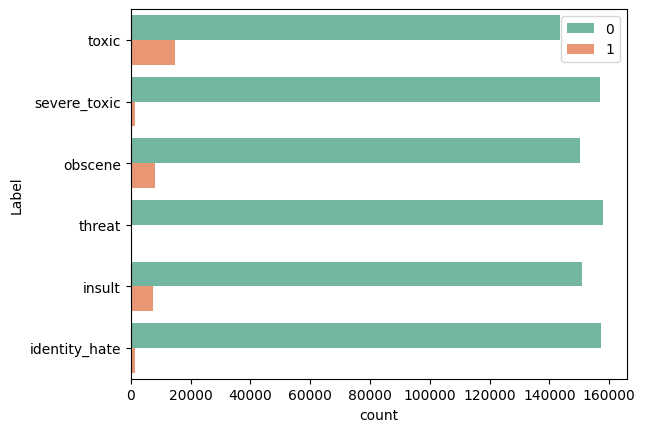

In [ ]:
sns.countplot(data=pos_label_df, y="Label", hue="Value", palette="Set2")
plt.legend(loc="upper right")

#### **Question 2:** What is the relationship between the distributions of various labels with respect to each other?</h4>

**Note**
- If there exists a strong relationship between any two labels, then one of them could potentially be dropped

In [ ]:
print(label_df["toxic"].dtype)

uint8


In [ ]:
print(label_df.corr())

                  toxic  severe_toxic   obscene    threat    insult  \
toxic          1.000000      0.298106  0.671268  0.155317  0.643690   
severe_toxic   0.298106      1.000000  0.391422  0.115061  0.366549   
obscene        0.671268      0.391422  1.000000  0.137986  0.736951   
threat         0.155317      0.115061  0.137986  1.000000  0.147134   
insult         0.643690      0.366549  0.736951  0.147134  1.000000   
identity_hate  0.263550      0.200256  0.285208  0.114268  0.337360   

               identity_hate  
toxic               0.263550  
severe_toxic        0.200256  
obscene             0.285208  
threat              0.114268  
insult              0.337360  
identity_hate       1.000000  


In [ ]:
# Crosstab: Since a crosstab between all six classes cannot be visualized, let's take a look
# at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in label_df.columns[1: ]:
    confusion_matrix = pd.crosstab(index=label_df[main_col], columns=label_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=label_df.columns[1:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

**Observations**:
- All severely toxic labels are a subset of toxic labels
- Almost all of the rest of the sentences, which are marked **obscene**, **threat**, **insult** or **identity_hate** are also **toxic**

<Axes: title={'center': 'Heatmap of data labels'}>

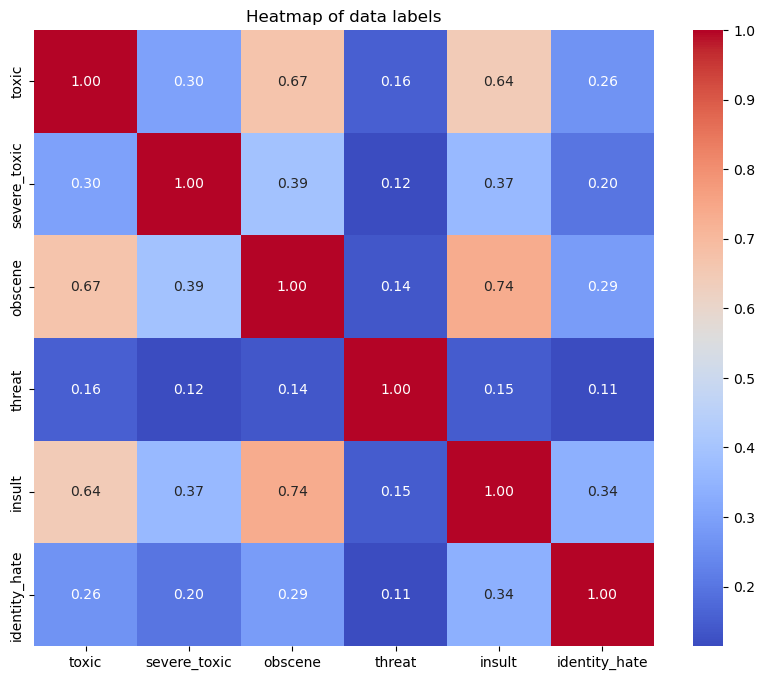

In [ ]:
# Mask the upper half of the data
mask = np.triu(np.ones_like(label_df, dtype=bool))

# Create a heatmap
corr = label_df.corr()
plt.figure(figsize=(10, 8))
plt.title('Heatmap of data labels')

sns.heatmap(corr, cmap="coolwarm", xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")

**Observations**
- There exists a relatively **stronger relationship** amongst **toxicity, obscenity and insult**
- Since these are binary labels and we have utilized **Pearrson's correlation** method to compute the above values (which are more applicable for continuous-valued features), we could potentially be getting spurious results
    - To mitigate this, we will use **Cramer V** rule for verifying the above results, which are better       suited for categorical values/labels

In [ ]:
def cramers_V(var1, var2):
    """
    Calculate Cramér's V statistic for the association between two categorical variables.

    This function computes the Cramér's V statistic, a measure of association
    between categorical variables. It is an extension of the chi-squared test
    for independence and indicates the strength of association between two
    categorical variables.

    Arguments:
    var1 (array-like): First categorical variable.
    var2 (array-like): Second categorical variable.

    Refer this link for further details:
    https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

    Parameters:
    ----------
    var1, var2 : array-like
        Two categorical variables (e.g., arrays or Pandas Series).

    Returns:
    -------
    float
        Cramér's V statistic representing the strength of association
        between var1 and var2. Values range from 0 to 1, where 0 indicates
        no association and 1 indicates a perfect association.

    """
    # Build a contingency table (cross-tabulation) between var1 and var2
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))

    # Calculate the chi-squared statistic and retrieve the test statistic from chi2_contingency
    stat = chi2_contingency(crosstab)[0]

    # Compute the total number of observations in the contingency table
    obs = np.sum(crosstab)

    # Determine the minimum value between the number of rows and columns of the contingency table
    mini = min(crosstab.shape) - 1

    # Calculate Cramér's V statistic using the formula
    return np.sqrt(stat / (obs * mini))

In [ ]:
## Calculate Kramer's Statistic
print(f"Toxicity and Obscenity: {cramers_V(label_df['toxic'], label_df['obscene']):.2f}")
print(f"Toxicity and Insult: {cramers_V(label_df['toxic'], label_df['insult']):.2f}")
print(f"Obscenity and Insult: {cramers_V(label_df['obscene'], label_df['insult']):.2f}")

Toxicity and Obscenity: 0.67
Toxicity and Insult: 0.64
Obscenity and Insult: 0.74


**Observations**
- Thus, the correlation results returned by Pearrson's method are in fact trustworthy

#### **Question 3:** What is the distribution of most common words/phrases ?</h4>

In [ ]:
train_df[train_df.severe_toxic==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,hashtags,lang
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,[],en
181,006e87872c8b370c,you are a stupid fuck and your mother s cunt s...,1,1,1,0,1,0,[],en
442,01208d2b76624130,Hi I Am a fucking bitch .,1,1,1,0,1,0,[],en
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckh...,1,1,1,0,1,0,[],en
746,020316a0de9e0406,You know I was thinkingNobody really attacked ...,1,1,1,0,0,0,[],en
...,...,...,...,...,...,...,...,...,...,...
159096,f871b05d4caa6f20,You filthy stinking crow I am back Dirty crow ...,1,1,1,0,1,0,[],en
159099,f885a3e2d779342e,nowyou fucking pathetic moron . cc Jimbo Wales...,1,1,1,0,1,0,[],en
159281,fb726deec64157bd,LoL you are GAY you will never know how good i...,1,1,1,0,1,1,[],en
159312,fbf20e312cd4a78d,Walter Mercado Antonio quite frankly you are a...,1,1,1,0,1,0,[],en


##### Some Example Comments

In [ ]:
print("Severely Toxic: ")
print(train_df[train_df["severe_toxic"]==1].iloc[3,1])
print(train_df[train_df["severe_toxic"]==1].iloc[5,1])

Severely Toxic: 
What a motherfucking piece of crap those fuckheads for blocking us
Here is an idea Go fuck yourself cumshitter .


In [ ]:
print("Obscene: ")
print(train_df[train_df["obscene"]==1].iloc[3,1])
print(train_df[train_df["obscene"]==1].iloc[5,1])

Obscene: 
Tony Sidaway is obviously a fistfuckee . He loves an arm up his ass .
All of my edits are good . Cunts like you who revert good edits because you are too stupid to understand how to write well and then revert other edits just because you have decided to bear a playground grudge are the problem . Maybe one day you will realise the damage you did to a noble project .


In [ ]:
print("Threat: ")
print(train_df[train_df["threat"]==1].iloc[3,1])
print(train_df[train_df["threat"]==1].iloc[5,1])

Threat: 
Fuck you Smith . Please have me notified when you die . I want to dance on your grave .
SHUT UP YOU FAT POOP OR I WILL KICK YOUR ASS


In [ ]:
print("Insult: ")
print(train_df[train_df["insult"]==1].iloc[3,1])
print(train_df[train_df["insult"]==1].iloc[5,1])

Insult: 
Tony Sidaway is obviously a fistfuckee . He loves an arm up his ass .
Would you both shut up you do not run wikipedia especially a stupid kid .


In [ ]:
print("Identity Hate: ")
print(train_df[train_df["identity_hate"]==1].iloc[3,1])
print(train_df[train_df["identity_hate"]==1].iloc[5,1])

Identity Hate: 
Kill all niggers . I have hard that others have said this should this be included That racists sometimes say these .
Gay The existence of CDVF is further proof that is a sad twat . He is also very ugly and has a willy for a face .


**Observations**
- At first glance, it seems that there is hardly any difference between different types of comments
- Note
    - Words and letters are still in uppercase. Fix it if required
- We would utilize wordclouds to better understand our data

In [ ]:
!ls ../input/imagesforkernal/

ls: cannot access '../input/imagesforkernal/': No such file or directory


In [ ]:
text = " ".join(train_df["comment_text"])

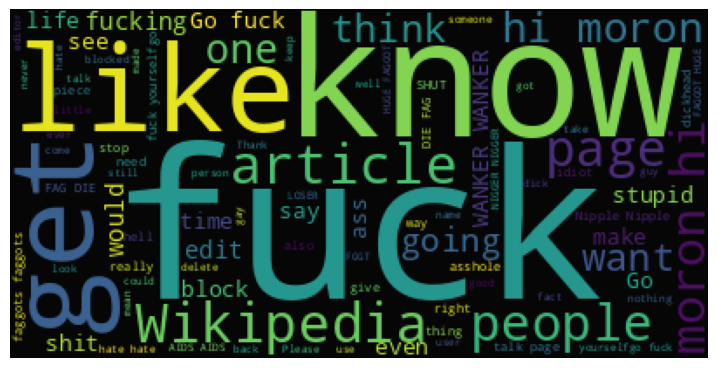

In [ ]:
# Toxic Comments
sub_comment_df = train_df[(train_df["toxic"]==1) | (train_df["severe_toxic"]==1)]["comment_text"]
text = "".join(sub_comment_df)
wc = WordCloud(background_color="black", max_words=2000, stopwords=eng_stopwords)
wc.generate(text)
plt.figure(figsize=(9, 5))
plt.axis("off")
# plt.title("Words frequented in clean toxic comments", fontsize=20)
plt.imshow(wc.recolor(colormap='viridis' , random_state=17), alpha=0.98)

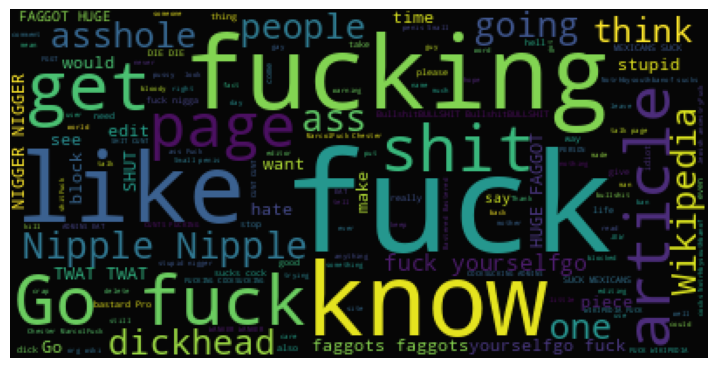

In [ ]:
# Obscene Comments
sub_comment_df = train_df[(train_df["obscene"]==1)]["comment_text"]
text = "".join(sub_comment_df)
wc = WordCloud(background_color="black", max_words=2000, stopwords=eng_stopwords)
wc.generate(text)
plt.figure(figsize=(9, 5))
plt.axis("off")
# plt.title("Words frequented in clean obscene comments", fontsize=20)
plt.imshow(wc.recolor(colormap='viridis' , random_state=17), alpha=0.98)

**Observations**
- From a preliminary view, it seems that obscene comments do indeed have greater number of sexually offensive and racial slurs than their non-obscene counterparts  

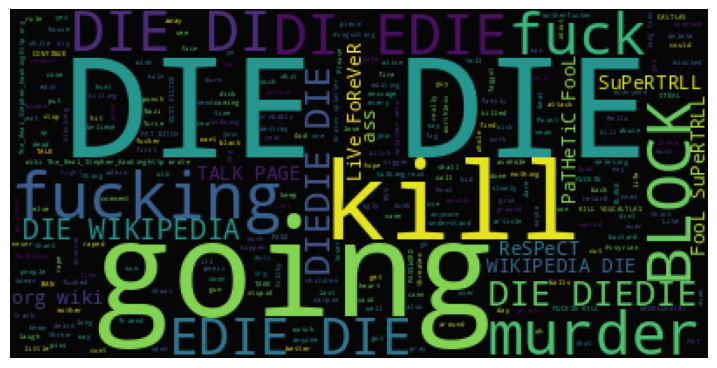

In [ ]:
# Threat Comments
sub_comment_df = train_df[(train_df["threat"]==1)]["comment_text"]
text = "".join(sub_comment_df)
wc = WordCloud(background_color="black", max_words=2000, stopwords=eng_stopwords)
wc.generate(text)
plt.figure(figsize=(9, 5))
plt.axis("off")
# plt.title("Words frequented in clean threat comments", fontsize=20)
plt.imshow(wc.recolor(colormap='viridis' , random_state=17), alpha=0.98)

**Observations**
- Words such as "die", "fucking", "kill" etc. are highly inappropriate, particularly when directed at someone, which is indicative of strong negative emotions, aggression or hostility.

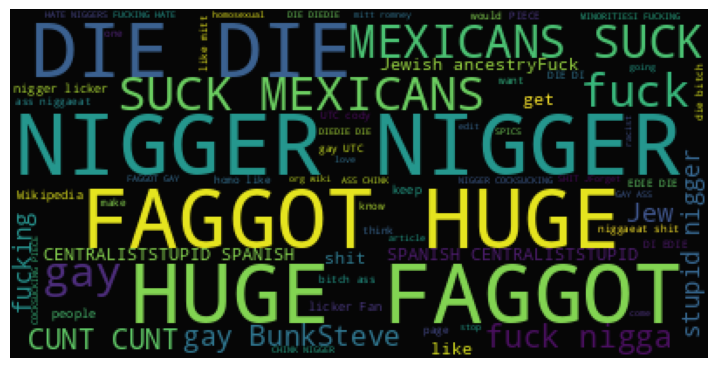

In [ ]:
# Identity hate based comments
sub_comment_df = train_df[(train_df["identity_hate"]==1)]["comment_text"]
text = "".join(sub_comment_df)
wc = WordCloud(background_color="black", max_words=2000, stopwords=eng_stopwords)
wc.generate(text)
plt.figure(figsize=(9, 5))
plt.axis("off")
# plt.title("Words frequented in clean threat comments", fontsize=20)
plt.imshow(wc.recolor(colormap='viridis' , random_state=17), alpha=0.98)

**Observations**
-  From a preliminary point of view, it seems that **identity_hate** based comments are more centered towards an individual's race, sex, religion, etc.

#### **Question 4:** Distribution of topics within the dataset</h4>

## Topic Modeling
- Topic modeling can be a useful tool to summarize the context of a huge corpus(text) by guessing what the "Topic" or the general theme of the sentence.
- This can also be used as inputs to our classifier if they can identify patterns or "Topics" that indicate toxicity.
- The following steps would be involved in the process:
    - Preprocessing
        - Tokenize (split the documents into tokens)
        - Lemmatize the tokens
        - Compute bigrams
        - Compute a bag-of-words representation of the data
    - Lemmatization
    - Creation of dictionary (list all words in the cleaned text)
    - Topic Modeling using LDA
    - Visualization with pyLDAviz
    - Convert topics to sparse vectors
    - Feed sparse vectors to the model


In [ ]:
# Accumulate all comments in a list
doc_ls, processed_doc_ls = [], []

for com_text in train_df["comment_text"]:
    doc_ls.append(com_text)

print(doc_ls[0: 3])

['ExplanationWhy the edits made under my username Hardcore Metallica Fan were reverted They were not vandalisms just closure on some GAs after I voted at New York Dolls FAC . And please do not remove the template from the talk page since I am retired now', 'D aww He matches this background colour I am seemingly stuck with . Thanks . talk January UTC', 'Hey man I am really not trying to edit war . It is just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page . He seems to care more about the formatting than the actual info .']


In [ ]:
train_df["comment_length"] = train_df["comment_text"].apply(len)
test_df["comment_length"] = test_df["comment_text"].apply(len)

In [ ]:
# def lemmatize(self, word: str, pos: str = "n") -> str:
#     """Lemmatize `word` using WordNet's built-in morphy function.
#        Returns the input word unchanged if it cannot be found in WordNet.

#       :param word: The input word to lemmatize.
#       :type word: str
#       :param pos: The Part Of Speech tag. Valid options are `"n"` for nouns,
#             `"v"` for verbs, `"a"` for adjectives, `"r"` for adverbs and `"s"`
#             for satellite adjectives.
#       :param pos: str
#       :return: The lemma of `word`, for the given `pos`.
#     """
#     lemmas = wn._morphy(word, pos)
#     return min(lemmas, key=len) if lemmas else word

In [ ]:
# [lemmatize(str(word), "n") for word in nltk.word_tokenize("I am a boy with a big fat butt!!!")]

In [ ]:
# [porter_stem.stem(word) for word in nltk.word_tokenize("I am a boy with a big fat butt!!!")]

In [ ]:
# # Load the Spacy English language
# from spacy.lang.en import English

# # Load English tokenizer, tagger, Parser and NER
# nlp = English()

# # Custom pipeline components for lemmatization and adding bigrams
# processed_docs = [], []

# # Add lemmatizer to the Spacy pipeline
# lemmatizer = nlp.add_pipe("lemmatizer")

# # Initialize the SpaCy pipeline to load the required data
# nlp.initialize()


# for doc in lemmatizer.pipe(doc_ls):
#     print(doc)
#     break

# Store in Processed docs
# from typing import List, Dict
# def tokenizer_lemmatize(text: str) -> List[str]:
#     tokens = nltk.word_tokenize(text)
#     return [wordnet_lemma.lemmatize(token) for token in tokens]

#### Check if I have added the code for deaccentisization in the preprocessing step

In [ ]:
# train_df["tokens"] = train_df["comment_text"].apply(tokenizer_lemmatize)

In [ ]:
# test_df["tokens"] = test_df["comment_text"].apply(tokenizer_lemmatize)

In [ ]:
# Convert into lookup tables within the dictionary using doc2bow
# print(dictionary.doc2bow(all))

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="Processing")

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
nlp = spacy.load("en_core_web_md", exclude=["tok2vec", "parser", "attribute_ruler", "ner"])

In [ ]:
!pip install Unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
unidecode("I'm looking forward to the weekend!🎉")

"I'm looking forward to the weekend!"

In [ ]:
def lemmatize(text: str, min_len: int = 3) -> str:
    doc = nlp(text)

    # Extract lemmatized text, excluding punctuation, certain parts of speech,
    # words shorter than min_len, and de-accenting the text
    lemmatized_text = [unidecode(token.lemma_) for token in doc if not token.is_punct and token.pos_ not in ('PRON', 'AUX', 'ADP', 'CCONJ') and len(token.lemma_) >= min_len]

    return lemmatized_text

In [ ]:
#to seperate sentenses into words
# def preprocess(comment):
#     """
#     Function to build tokenized texts from input comment
#     """
#     return gensim.utils.simple_preprocess(comment, deacc=True, min_len=3)

In [ ]:
lemmatize("Hey man I am really not trying to edit war . It is just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page . He seems to care more about the formatting than the actual info .")

['hey',
 'man',
 'really',
 'not',
 'trying',
 'edit',
 'war',
 'just',
 'that',
 'this',
 'guy',
 'constantly',
 'removing',
 'relevant',
 'information',
 'and',
 'talking',
 'through',
 'edits',
 'instead',
 'talk',
 'page',
 'seems',
 'care',
 'more',
 'about',
 'the',
 'formatting',
 'than',
 'the',
 'actual',
 'info']

In [ ]:
# Check for extracting lemma based on POS
# def lemmatize(text: str) -> str:
#     doc = nlp(text)

#     # Extract lemmatized text and store it back into a string
#     # lemmatized_text = " ".join([token.lemma_ for token in doc])

#     return [token.lemma_ for token in doc]

In [ ]:
import os
# import multiprocessing

# Using os module
cpu_count_os = os.cpu_count()
print(f"CPU count: {cpu_count_os}")

CPU count: 2


In [ ]:
# !pip install -U pandas # upgrade pandas
# !pip install swifter # first time installation
# !pip install swifter[notebook] # first time installation including dependency for rich progress bar in jupyter notebooks
# !pip install swifter[groupby] # first time installation including dependency for groupby.apply functionality

In [ ]:
train_df["tokenized_text"] = train_df["comment_text"].progress_apply(lemmatize)

Processing: 100%|██████████| 158431/158431 [05:09<00:00, 511.46it/s]


In [ ]:
test_df["tokenized_text"] = test_df["comment_text"].progress_apply(lemmatize)

Processing: 100%|██████████| 147824/147824 [04:08<00:00, 595.44it/s]


In [ ]:
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [ ]:
train_df = train_df.drop("index", axis=1)
test_df = test_df.drop("index", axis=1)

In [ ]:
test_df["tokenized_text"][0]

['bitch',
 'rule',
 'more',
 'succesful',
 'then',
 'you',
 'will',
 'ever',
 'what',
 'with',
 'you',
 'and',
 'hating',
 'you',
 'sad',
 'mofuckasi',
 'should',
 'bitch',
 'slap',
 'you',
 'are',
 'pethedic',
 'white',
 'faces',
 'and',
 'get',
 'you',
 'kiss',
 'ass',
 'you',
 'guys',
 'sicken',
 'rule',
 'about',
 'pride',
 'music',
 'man',
 'not',
 'diss',
 'that',
 'shit',
 'him',
 'and',
 'nothin',
 'wrong',
 'bein',
 'like',
 'tupac',
 'was',
 'brother',
 'toofuckin',
 'white',
 'boys',
 'get',
 'things',
 'right',
 'next',
 'time']

In [ ]:
# with open('train_v2.pkl', 'wb') as handle:
#     pickle.dump(train_df, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('test_v2.pkl', 'wb') as handle:
#     pickle.dump(test_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Serialize both the dataframes

In [ ]:
# corpus_token_ls = list(train_df["tokenized_text"])
# corpus_token_ls.append(list(test_df["tokenized_text"]))
all_tokenized_text = train_df["tokenized_text"].append(test_df["tokenized_text"])
# Phrases help us group together bigrams :  new + york --> new_york
# bigram = gensim.models.Phrases(corpus_token_ls)

In [ ]:
all_tokenized_text = all_tokenized_text.reset_index()

In [ ]:
all_tokenized_text = all_tokenized_text.drop("index", axis=1)

In [ ]:
import gensim

In [ ]:
# Phrases help us group together bigrams :  new + york --> new_york
bigram = gensim.models.Phrases(all_tokenized_text["tokenized_text"].tolist(), min_count=20)

In [ ]:
docs = all_tokenized_text["tokenized_text"].tolist()

In [ ]:
for idx in tqdm(range(len(docs))):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document. Why the word repition here?
            docs[idx].append(token)

100%|██████████| 306255/306255 [01:02<00:00, 4927.16it/s]


In [ ]:
docs_formatted = []
for i in tqdm(range(len(docs))):
    docs_formatted.append(list(set(docs[i])))

100%|██████████| 306255/306255 [00:02<00:00, 132727.20it/s]


In [ ]:
docs_formatted[60]

['frank', 'talk', 'redirect_talk', 'mason', 'redirect', 'herbert']

In [ ]:
all_tokenized_text["tokenized_text"].tolist()[0]

['explanationwhy',
 'the',
 'edits',
 'made',
 'under',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'were',
 'reverted',
 'they',
 'were',
 'not',
 'vandalisms',
 'just',
 'closure',
 'some',
 'gas',
 'after',
 'voted',
 'new',
 'york',
 'dolls',
 'fac',
 'and',
 'please',
 'not',
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk',
 'page',
 'since',
 'retired',
 'now']

In [ ]:
# Export detected phrases
# phrases = bigram.export_phrases(all_tokenized_text["tokenized_text"].tolist())

# # View detected phrases
# for phrase, score in phrases:
#     print(f"Phrase: {phrase}, Score: {score}")

In [ ]:
type(all_tokenized_text)

In [ ]:
bigram[all_tokenized_text["tokenized_text"].iloc[32]]

In [ ]:
from gensim.corpora import Dictionary

In [ ]:
with open('docs_lda_obj.pkl', 'wb') as file:
    pickle.dump(docs_formatted, file)

In [ ]:
with open("dictionary_lda_obj.pkl", "wb") as file:
    pickle.dump(dictionary, file)

In [ ]:
#create the dictionary
dictionary = Dictionary(docs_formatted)
print("There are", len(dictionary),"number of words in the final dictionary")

There are 293950 number of words in the final dictionary


In [ ]:
iter(dictionary)

In [ ]:
#convert into lookup tuples within the dictionary using doc2bow
print(dictionary.doc2bow((docs_formatted[2000])))
print("Wordlist from the sentence:", all_tokenized_text["tokenized_text"].iloc[2000])

#to check
print("Wordlist from the dictionary lookup:",
      dictionary[21], dictionary[22], dictionary[23], dictionary[24], dictionary[25], dictionary[26], dictionary[27])

[(1, 1), (24, 1), (28, 1), (48, 1), (56, 1), (95, 1), (97, 1), (113, 1), (135, 1), (144, 1), (434, 1), (472, 1), (553, 1), (884, 1), (1411, 1), (1641, 1), (1806, 1), (2293, 1), (4203, 1), (4853, 1), (9259, 1), (11194, 1), (11756, 1), (15572, 1), (15573, 1), (15574, 1), (15575, 1), (15576, 1), (15577, 1)]
Wordlist from the sentence: ['priyanka', 'chopra', 'endorsements', 'hey', 'bollyjeff', 'have', 'some', 'concerns', 'about', 'endorsement', 'section', 'says', 'she', 'has', 'represented', 'brands', 'like', 'and', 'nothing', 'say', 'about', 'the', 'brands', 'she', 'endorses', 'nowit', 'confusing', 'whether', 'she', 'endorsing', 'know', 'what', 'mean']
Wordlist from the dictionary lookup: retired reverted since some talk talk_page template


In [ ]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import time

In [ ]:
#scale it to all text
start_time = time.time()
corpus = [dictionary.doc2bow(text) for text in docs_formatted]
end_corpus = time.time()
print("Time till corpus creation:", end_corpus - start_time,"s")

Time till corpus creation: 15.848106384277344 s


In [ ]:
with open("corpus_lda_obj.pkl", "wb") as file:
    pickle.dump(corpus, file)

In [ ]:
#create the LDA model
start_lda = time.time()
ldamodel = LdaModel(corpus=corpus, num_topics=15, id2word=dictionary)
end_lda = time.time()
print("Time till LDA model creation:",end_lda-start_lda, "s")

Time till LDA model creation: 292.3604245185852 s


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requ

In [ ]:
import pyLDAvis.gensim

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/opt/conda/lib/python3.10/site-packages/scipy/sparse/linalg/isolve/iterative.py:10: DeprecationWarning: Please use `LinearOperator` from the `scipy.sparse.linalg` namespace, the `scipy.sparse.linalg.interface` namespace is deprecated.
  from scipy.sparse.linalg.interface import LinearOperator
/opt/conda/lib/python3.10/site-packages/scipy/sparse/linalg/isolve/utils.py:7: DeprecationWarning: Please use `asmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import asmatrix
/opt/conda/lib/python3.10/site-packages/scipy/sparse/linalg/isolve/utils.py:9: DeprecationWarning: Please use `aslinearoperator` from the `scipy.sparse.linalg` namespace, the `scipy.sparse.linalg.interface` namespace is deprecated.
  from scipy.sparse.linalg.interface import aslinearoperator, LinearOperator, \
/opt/conda/lib/python3.10/site-packages/scipy/sparse/linalg/isolve/utils.py:9: DeprecationWarning: Please use `LinearOperator` from the `scipy

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.204865  0.006781       1        1  33.345336
5     -0.184554  0.032559       2        1  11.711766
2     -0.181793  0.083118       3        1   9.628684
6     -0.039811  0.169285       4        1   8.953102
4     -0.165974  0.012291       5        1   7.057466
1     -0.180385 -0.021437       6        1   6.093968
10    -0.124007 -0.193322       7        1   5.139728
11    -0.062232 -0.327580       8        1   4.544708
9      0.046068  0.106092       9        1   2.982976
14     0.067828  0.147553      10        1   2.917845
7      0.084926  0.099952      11        1   2.527546
12     0.209084  0.047039      12        1   1.658630
8      0.189800  0.072726      13        1   1.614774
3      0.288620 -0.111156      14        1   1.011795
0      0.257297 -0.123901      15        1   0.811675, topic_info=        Term           Freq          Total Category  logprob  loglift
129      you  149213.000000  149213.000000  Default  30.0000  30.0000
16       not  150102.000000  150102.000000  Default  29.0000  29.0000
28       the  221684.000000  221684.000000  Default  28.0000  28.0000
8       from   57324.000000   57324.000000  Default  27.0000  27.0000
19    please   40186.000000   40186.000000  Default  26.0000  26.0000
...      ...            ...            ...      ...      ...      ...
6822     red     967.772880    1686.721727  Topic15  -4.5634   4.2583
3365   large    1320.014931    3612.637834  Topic15  -4.2530   3.8070
5701  center     795.986490    1538.146182  Topic15  -4.7588   4.1551
3136   color     890.417735    2911.553432  Topic15  -4.6467   3.6291
1862    sent     582.633908    1378.455507  Topic15  -5.0708   3.9527

[1087 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
2374      8  0.998932                .com
2042      7  0.999418                .org
9701     15  0.999040               .them
48        1  0.436608               about
48        2  0.101062               about
...     ...       ...                 ...
150      15  0.002541                your
6071     10  0.999163  your_contributions
3096      6  0.998785          your_input
1141     15  0.998573            your_mom
1990     13  0.999140           your_test

[2983 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 6, 3, 7, 5, 2, 11, 12, 10, 15, 8, 13, 9, 4, 1])

#### **Question 5:** Distribution of comment lengths</h4>

In [ ]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,hashtags,lang,comment_length,tokenized_text
0,0000997932d777bf,ExplanationWhy the edits made under my usernam...,0,0,0,0,0,0,[],en,252,"[explanationwhy, the, edits, made, under, user..."
1,000103f0d9cfb60f,D aww He matches this background colour I am s...,0,0,0,0,0,0,[],en,93,"[aww, matches, this, background, colour, seemi..."
2,000113f07ec002fd,Hey man I am really not trying to edit war . I...,0,0,0,0,0,0,[],en,237,"[hey, man, really, not, trying, edit, war, jus..."
3,0001b41b1c6bb37e,MoreI can not make any real suggestions on imp...,0,0,0,0,0,0,[#Transport],en,607,"[morei, can, not, make, any, real, suggestions..."
4,0001d958c54c6e35,You sir are my hero . Any chance you remember ...,0,0,0,0,0,0,[],en,66,"[you, sir, are, hero, any, chance, you, rememb..."


**To Do**: Beautify the plot later

In [ ]:
import matplotlib.ticker as ticker

In [ ]:
train_df["comment_length"].min()

0

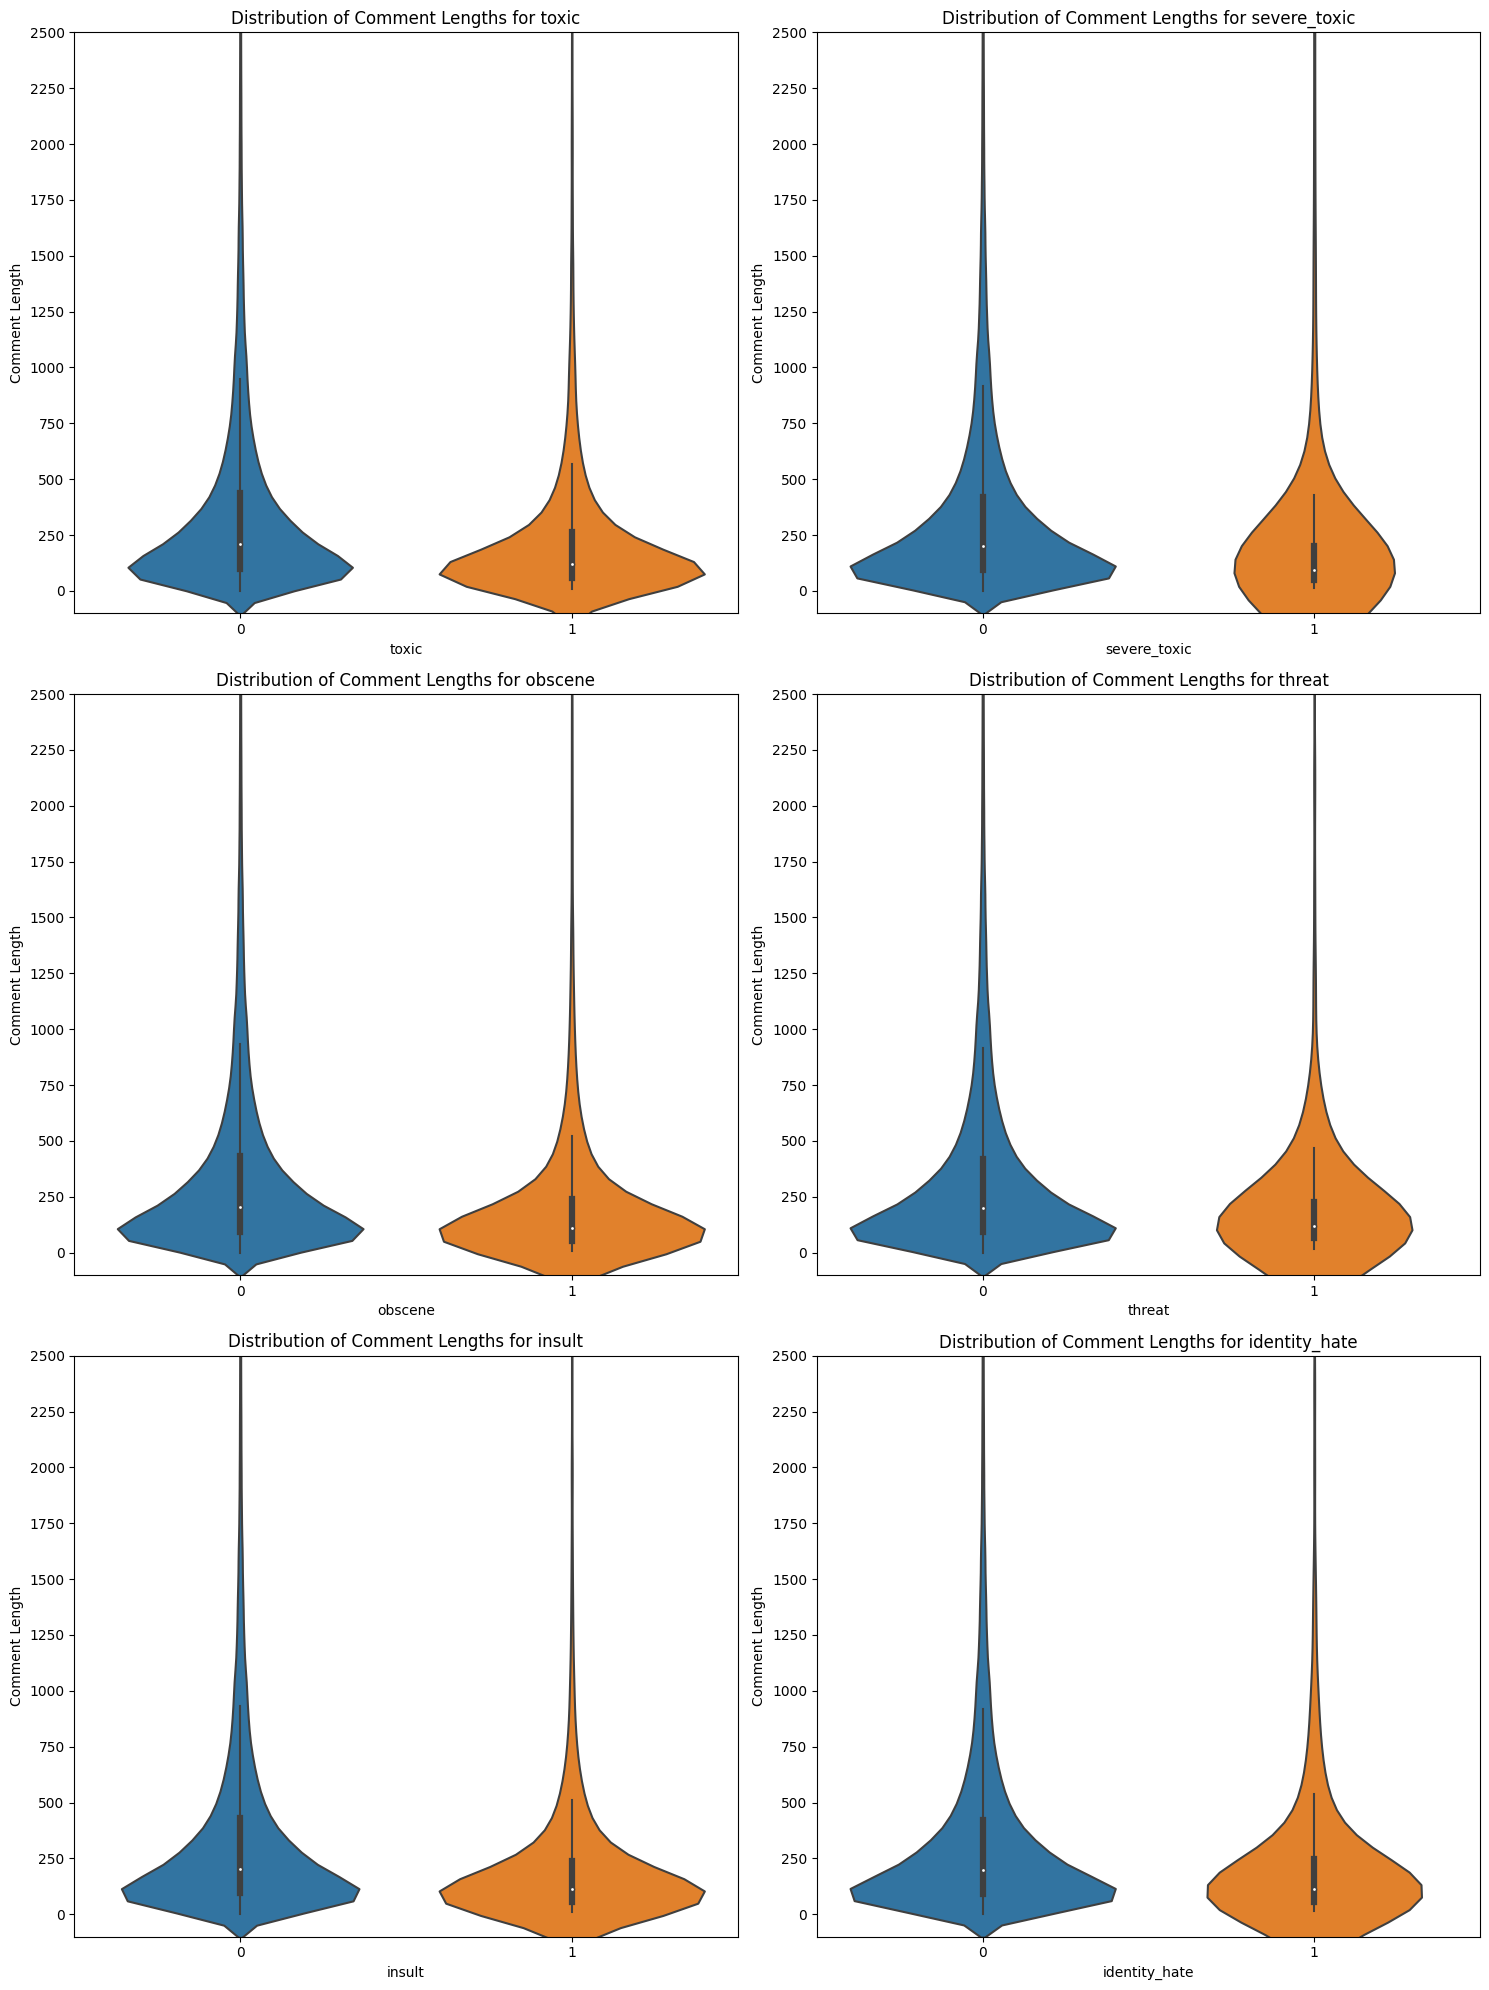

In [ ]:
col_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Creating subplots for each label
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Plotting violin plots for each label column
for i, column in enumerate(col_labels):
    sns.violinplot(data=train_df, y="comment_length", x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of Comment Lengths for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Comment Length')
    axes[i].yaxis.set_major_locator(ticker.MultipleLocator(base=250))  # Set y-axis ticks at multiples of 250
    axes[i].set_ylim(-100, 2500)  # Set the upper limit of the y-axis scale to 3000

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

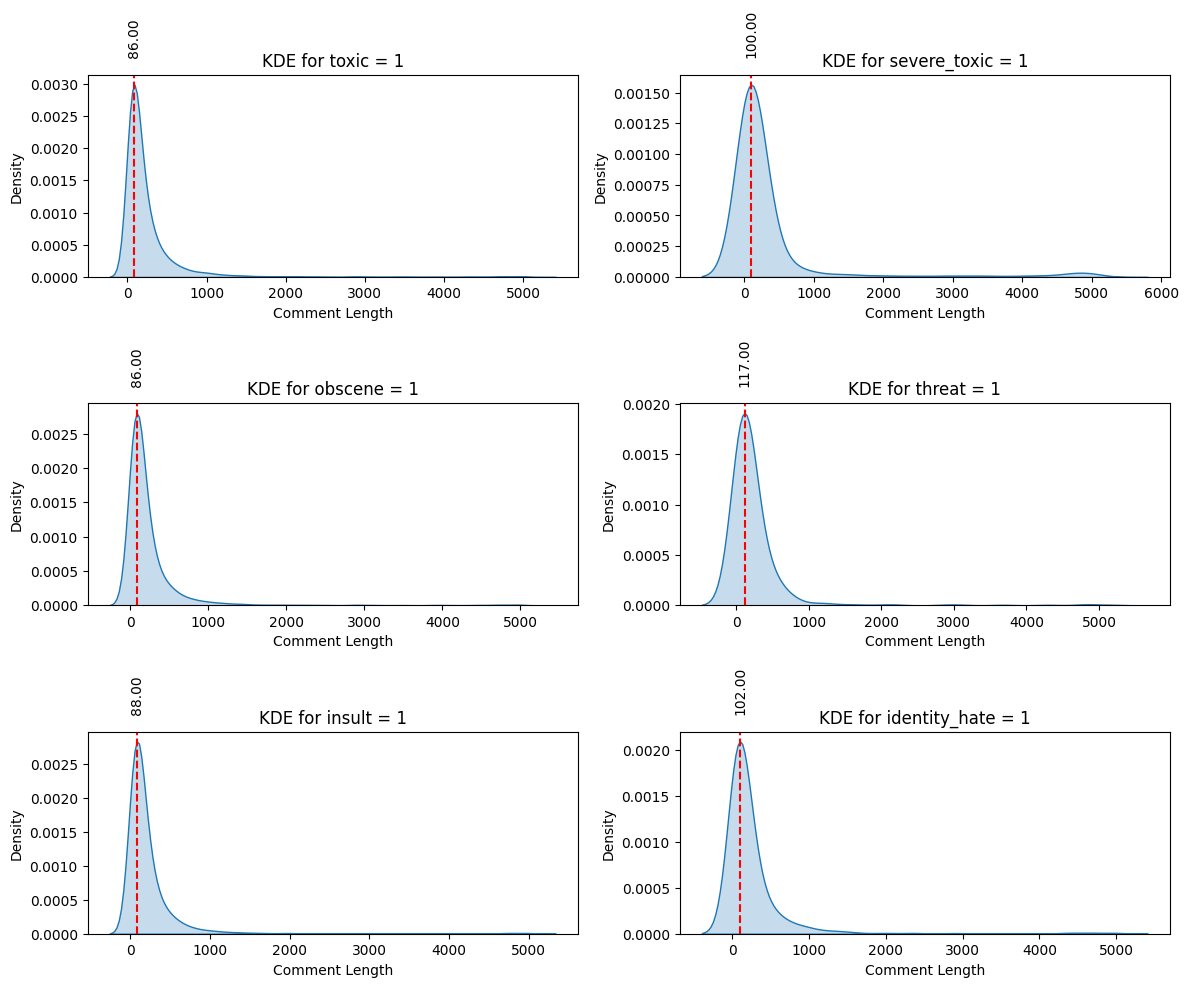

In [ ]:
from scipy.stats import gaussian_kde

# Assuming col_labels represent your class labels
col_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Creating subplots for KDE plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Plotting KDE for each class label
for i, label in enumerate(col_labels):
    data = train_df[train_df[label] == 1]['comment_length']
    sns.kdeplot(data=data, ax=axes[i], shade=True)
    axes[i].set_title(f'KDE for {label} = 1')
    axes[i].set_xlabel('Comment Length')
    axes[i].set_ylabel('Density')

    # Calculate KDE using Gaussian Kernel Density Estimation
    kde = gaussian_kde(data)
    density_peak = data.iloc[kde.pdf(data).argmax()]

    # Plot vertical line at density peak
    axes[i].axvline(x=density_peak, color='red', linestyle='--')

    # Annotate the density peak value above the plot
    axes[i].annotate(f'{density_peak:.2f}',
                     xy=(density_peak, 0),
                     xytext=(density_peak, axes[i].get_ylim()[1] * 1.1),
                     rotation=90,
                     ha='center')

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

**Observations**
- There is a minor difference in tail lengths of the distributions, nothing appreciable  

**Bivariate**
-

**Multivariate**
-

In [ ]:
x=train.iloc[:,2:].sum()

#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

- The toxicity is not evenly spread out across classes. Hence we might face class imbalance problems
- There are ~95k comments in the training dataset and there are ~21k tags and ~86k clean comments!?
- This is only possible when multiple tags are associated with each comment (eg) a comment can be classified as both toxic and obscene.

# Pending Preprocessing
    - Adding unigrams, bigrams and trigrams
    - Sentiment of extracted hashtags: if any
    - Check...
# Add the code for NBSVM

## Feature Engineering
- I have broadly classified

### Direct Features
- Features which are directly due to words/content. We would be exploring the following techniques
    - Word Frequency features
        - Count features
            - Comment Length
            - Unique word percentage out of total no of words
            -
        - Bigrams
        - Trigrams
    - Vector distance mapping of words (Eg: Word2Vec)
    - Sentiment Scores
    - Is there a way to tag cuss words?
    
### Indirect Features
- Some more experimental features
    - Count of sentences
    - Count of words
    - Count of unique words
    - Count of letters
    - Count of punctuations
    - Count of uppercase words/letters
    - Count of stop words
    - Avg length of each word
    
### Leaky Features
- From the example, comments contain identifier information (eg: IP, username, etc.). But we have to be wary of them, cause they may cause overfitting

### Indirect features
- Some more experimental features
    - Sentiment scores derived from word embeddings
    - Topic modeling features
    - Document similarity scores???

## Leaky Features
- **Caution**: Even though including these features might help us perform better in this particular scenario, it will not make sense to add him in the final model/general purpose model
- Here we are creating our own custom **count vectorizer** to create count variables that match our regex condition
- **Note**: Use Data Version Control to capture these features from the raw data itself

In [ ]:
train_df = pd.read_pickle("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /train_v2.pkl.zip")
test_df = pd.read_pickle("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /test_v2.pkl.zip")

In [ ]:
train_df["comment_text"] = train_df["comment_text"].str.replace(" . ", ".")
test_df["comment_text"] = test_df["comment_text"].str.replace(" . ", ".")

In [ ]:
print(train_df.shape)
print(test_df.shape)

(158431, 12)
(147824, 6)


In [ ]:
train_df = train_df[train_df["comment_text"] != ""]
test_df = test_df[test_df["comment_text"] != ""]

In [ ]:
print(train_df.shape)
print(test_df.shape)

(158423, 12)
(147766, 6)


In [ ]:
train_df["comment_text"][0]

'ExplanationWhy the edits made under my username Hardcore Metallica Fan were reverted They were not vandalisms just closure on some GAs after.voted at New York Dolls FAC.And please do not remove the template from the talk page since.am retired now'

In [ ]:
import nltk
nltk.download('punkt')  # Download the 'punkt' tokenizer models if not downloaded

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,hashtags,lang,comment_length,tokenized_text
0,0000997932d777bf,ExplanationWhy the edits made under my usernam...,0,0,0,0,0,0,[],en,252,"[explanationwhy, the, edits, made, under, user..."
1,000103f0d9cfb60f,D aww He matches this background colour.am see...,0,0,0,0,0,0,[],en,93,"[aww, matches, this, background, colour, seemi..."
2,000113f07ec002fd,Hey man.am really not trying to edit war.It is...,0,0,0,0,0,0,[],en,237,"[hey, man, really, not, trying, edit, war, jus..."
3,0001b41b1c6bb37e,MoreI can not make any real suggestions on imp...,0,0,0,0,0,0,[#Transport],en,607,"[morei, can, not, make, any, real, suggestions..."
4,0001d958c54c6e35,You sir are my hero.Any chance you remember wh...,0,0,0,0,0,0,[],en,66,"[you, sir, are, hero, any, chance, you, rememb..."


In [ ]:
# Sentence Count
   #  '\n' can be used to count the number of sentences in each comment
train_df["sentence_count"] = train_df["comment_text"].progress_apply(lambda text: len(text.split(".")))
test_df["sentence_count"] = test_df["comment_text"].progress_apply(lambda text: len(text.split(".")))

#Word count in each comment:
train_df["count_word"] = train_df["comment_text"].progress_apply(lambda x: len(str(x).split()))
test_df["count_word"] = test_df["comment_text"].progress_apply(lambda x: len(str(x).split()))

#Unique word count
train_df['count_unique_word'] = train_df["comment_text"].progress_apply(lambda x: len(set(str(x).split())))
test_df['count_unique_word'] = test_df["comment_text"].progress_apply(lambda x: len(set(str(x).split())))

#Letter count
train_df["count_letters"] = train_df["comment_text"].progress_apply(lambda x: len(str(x)))
test_df["count_letters"] = train_df["comment_text"].progress_apply(lambda x: len(str(x)))

100%|██████████| 158423/158423 [00:00<00:00, 384543.93it/s]


In [ ]:
# Leaky Features
# Extracted from the resouce:
# train_df["ip"] = train_df["comment_text"].progress_apply(lambda text: re.findall(r"\d{1, 3}\.\d{1, 3}\.\d{1, 3}\.\d{1, 3}", str(text)))
# test_df["ip"] = test_df["comment_text"].progress_apply(lambda text: re.findall(r"\d{1, 3}\.\d{1, 3}\.\d{1, 3}\.\d{1, 3}", str(text)))

# # Count IPs
# train_df["count_ips"] = train_df["ip"].progress_apply(lambda text: len(text))
# test_df["count_ips"] = test_df["ip"].progress_apply(lambda text: len(text))

# # Links
# train_df["links"] = train_df["comment_text"].progress_apply(lambda text: re.findall(r"(https\:)*\/*\/*(www\.)?(\w+)(\.\w+)\/*\w*", str(text)))
# test_df["links"] = test_df["comment_text"].progress_apply(lambda text: re.findall(r"(https\:)*\/*\/*(www\.)?(\w+)(\.\w+)\/*\w*", str(text)))

# # Count links
# train_df["count_links"] = train_df["links"].progress_apply(lambda text: len(text))
# test_df["count_links"] = test_df["links"].progress_apply(lambda text: len(text))


# Article IDs...for now, I don't think this feature would be useful in any way

# Username mentions
# train_df["username"] = train_df["comment_text"].progress_apply(lambda text: re.findall(r"\[\[User(.*)\|", str(text)))
# test_df["username"] = test_df["comment_text"].progress_apply(lambda text: re.findall(r"\[\[User(.*)\|", str(text)))

# # Count Usernames
# train_df["count_username"] = train_df["username"].progress_apply(lambda text: len(text))
# test_df["count_username"] = test_df["username"].progress_apply(lambda text: len(text))


# Leaky Usernames
# cv = CountVectorizer()
# count_feats_user = cv.fit_transform(train_df["username"].apply(lambda text: str(text)))

In [ ]:
# Checking a few of the usernames

## Leaky Feature Stability: to be done before data cleaning - do later
- Come back to them later...Should be extracted on the uncleaned text
- Checking if the features have actually overleaked
- We might need to remove those features where the values have a lot of overlap between the training and the test set

In [ ]:
# leaky_features = ["ip", "link", "username", "count_ips", "count_links", "count_usernames"] # Shpuld be ex

In [ ]:
# from matplotlib_venn import venn2
# import matplotlib.pyplot as plt

# Assuming train and test are your dataframes and 'ip' is your column of interest
# train_ips = set(list(train_df["ip"]))
# test_ips = set(list(test_df["ip"]))

# Get the intersection
# common_ips = train_ips & test_ips

# Plot a Venn diagram
# venn2([len(train_ips), len(test_ips), len(common_ips)], set_labels = ("# of labels in train", "# of labels in test"))
# plt.show()

In [ ]:
# Assuming train and test are your dataframes and 'ip' is your column of interest
# train_links = set(train["link"])
# test_links = set(test["link"])

# # Get the intersection
# common_links = train_ips & test_ips

# # Plot a Venn diagram
# venn2([len(train_ips), len(test_ips), len(common_ips)], set_labels = ("# of labels in train", "# of labels in test"))
# plt.show()

In [ ]:
# Assuming train and test are your dataframes and 'username' is your column of interest
# train_usernames = set(train['username'])
# test_usernames = set(test['username'])

# # Get the intersection
# common_usernames = train_ips & test_ips

# # Plot a Venn diagram
# venn2([len(train_usernames), len(test_usernames), len(common_usernames)], set_labels = ("Train", "Test"))
# plt.show()

**Observation**
- Another thing which can be checked is to find out the list of IPs which are a part of blocked IP list on Wikipedia

---
<a name = Section8></a>
# **8. Missing Value Imputation**
---
- There aren't no missing values as such in this data

<a name = Section98></a>
### **9.8 Feature Encoding**

- Statistical word-based embeddings
 - Count vectorizer
 - Tfidf transformer
 - Hashing vectorizer

-

In [ ]:
# Text Feature Encoding
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [ ]:
train_df["comment_text"][0]

'ExplanationWhy the edits made under my username Hardcore Metallica Fan were reverted They were not vandalisms just closure on some GAs after.voted at New York Dolls FAC.And please do not remove the template from the talk page since.am retired now'

**Parameters**
- tokenizer: None
- min_df: I have applied a strict checking as of now (Modify later if required)
- token_pattern: Apply the default one (Modify later if required)
- ngram_range: (Modify later if required)

In [ ]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'hashtags', 'lang', 'comment_length',
       'tokenized_text', 'sentence_count', 'count_word', 'count_unique_word',
       'count_letters'],
      dtype='object')

In [ ]:
COLS_TO_TRAIN = ["comment_text", "comment_length", "sentence_count", "count_word", "count_unique_word", "count_letters"]
COLS_TO_PREDICT = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
X = train_df[COLS_TO_TRAIN]
y = train_df[COLS_TO_PREDICT]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
158426,0,0,0,0,0,0
158427,0,0,0,0,0,0
158428,0,0,0,0,0,0
158429,0,0,0,0,0,0


In [ ]:
# with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /features.pkl", "wb") as file:
#     pickle.dump(X, file, protocol=pickle.HIGHEST_PROTOCOL)

# with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /labels.pkl", "wb") as file:
#     pickle.dump(y, file, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
X = pd.read_pickle("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /features.pkl", compression="infer")
y = pd.read_pickle("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /labels.pkl", compression="infer")

In [ ]:
X

,comment_text,comment_length,sentence_count,count_word,count_unique_word,count_letters
0,ExplanationWhy the edits made under my usernam...,252,4,40,36,246
1,D aww He matches this background colour.am see...,93,4,12,12,87
2,Hey man.am really not trying to edit war.It is...,237,5,41,37,231
3,MoreI can not make any real suggestions on imp...,607,11,96,75,589
4,You sir are my hero.Any chance you remember wh...,66,2,13,13,64
...,...,...,...,...,...,...
158426,And for the second time of asking when your vi...,274,2,44,40,272
158427,You should be ashamed of yourself That is.horr...,84,3,16,16,82
158428,Spitzer Umm there is no actual article for pro...,79,3,12,12,77
158429,And it looks like it was actually you who put ...,117,3,24,21,115


In [ ]:
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
158426,0,0,0,0,0,0
158427,0,0,0,0,0,0
158428,0,0,0,0,0,0
158429,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed_value,
                                                      shuffle=True)

In [ ]:
X[0].shape

(158423,)

In [ ]:
y_valid

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
X_train = X_train.reset_index().drop("index", axis=1)
X_valid = X_valid.reset_index().drop("index", axis=1)
y_train = y_train.reset_index().drop("index", axis=1)
y_valid = y_valid.reset_index().drop("index", axis=1)

In [ ]:
y_train["obscene"].value_counts()

0    105274
1      5622
Name: obscene, dtype: int64

In [ ]:
y_valid["obscene"].value_counts()

0    45101
1     2426
Name: obscene, dtype: int64

- Since`comment_text` would be converted to a vector representation, it would be better if I standardize other direct/indirect features which would be stacked along with the text vector

In [ ]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,hashtags,lang,comment_length,tokenized_text,sentence_count,count_word,count_unique_word,count_letters
0,0000997932d777bf,ExplanationWhy the edits made under my usernam...,0,0,0,0,0,0,[],en,252,"[explanationwhy, the, edits, made, under, user...",4,40,36,246
1,000103f0d9cfb60f,D aww He matches this background colour.am see...,0,0,0,0,0,0,[],en,93,"[aww, matches, this, background, colour, seemi...",4,12,12,87
2,000113f07ec002fd,Hey man.am really not trying to edit war.It is...,0,0,0,0,0,0,[],en,237,"[hey, man, really, not, trying, edit, war, jus...",5,41,37,231
3,0001b41b1c6bb37e,MoreI can not make any real suggestions on imp...,0,0,0,0,0,0,[#Transport],en,607,"[morei, can, not, make, any, real, suggestions...",11,96,75,589
4,0001d958c54c6e35,You sir are my hero.Any chance you remember wh...,0,0,0,0,0,0,[],en,66,"[you, sir, are, hero, any, chance, you, rememb...",2,13,13,64


In [ ]:
temp_df = train_df.iloc[:, -6: ]
temp_df = temp_df.drop(["tokenized_text"], axis=1)

In [ ]:
# Outlier Detection

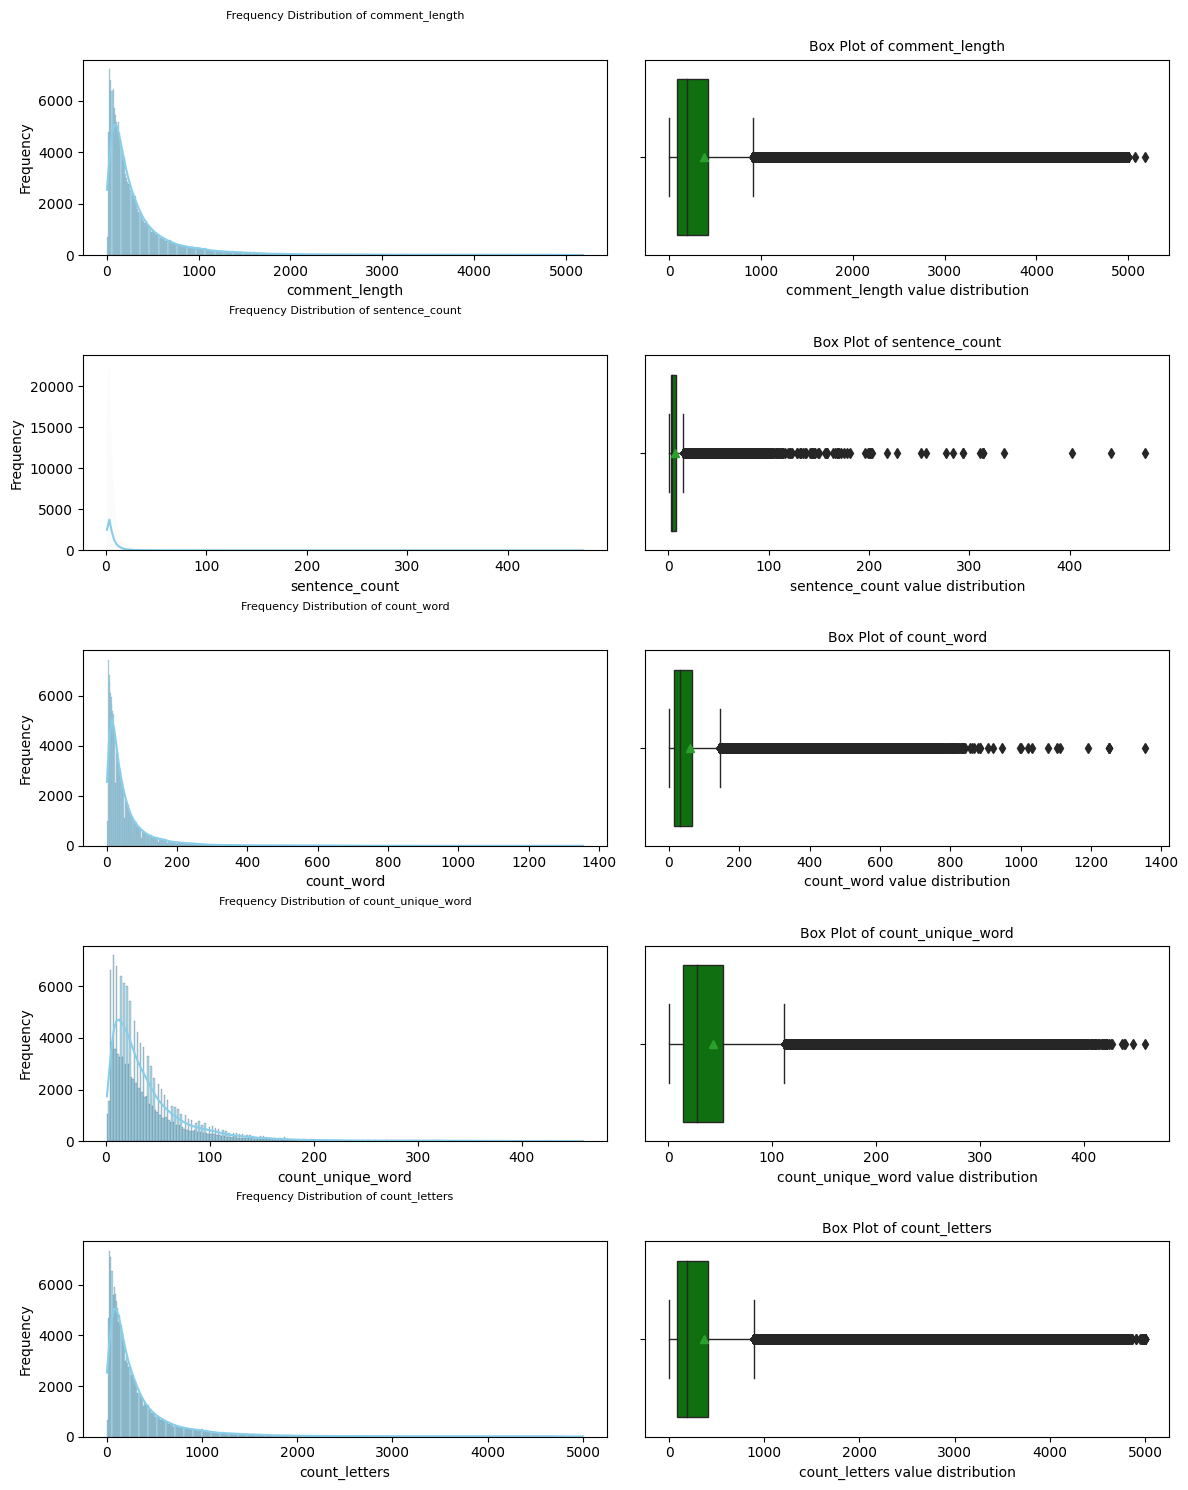

In [ ]:
# Outlier Visualization

# Define grid dimensions
rows, cols = 5, 2

# Create a figure and grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 15))

# Loop through columns and create plots
for i, col in enumerate(temp_df.columns):

    # Histogram with KDE
    sns.histplot(temp_df[col], kde=True, ax=axes[i, 0], color="skyblue", alpha=0.7)
    axes[i, 0].set_title(f"Frequency Distribution of {col}", fontsize=8, pad=30)
    axes[i, 0].set_xlabel(f"{col}", fontsize=10)
    axes[i, 0].set_ylabel("Frequency", fontsize=10)

    plt.tight_layout(h_pad=0.5, w_pad=0.5)

    # Box plot
    sns.boxplot(
        x=temp_df[col], ax=axes[i, 1], color="green", showmeans=True, linewidth=1
    )
    axes[i, 1].set_title(f'Box Plot of {col}', fontsize=10)
    axes[i, 1].set_xlabel(f"{col} value distribution", fontsize=10)

plt.show()

**Observations**
- The derived numerical features are heavily skewed towards the right. We need to understand the distribution of labels with respect to the outliers to better gauge their impact
- Accordingly we will determine how to treat them

In [ ]:
com_len_IQR = train_df["comment_length"].quantile(0.75) - train_df["comment_length"].quantile(0.25)
comm_len_lower_bound = train_df["comment_length"].quantile(0.25) - 1.5 * com_len_IQR
comm_len_upper_bound = train_df["comment_length"].quantile(0.75) + 1.5 * com_len_IQR

In [ ]:
# Filter those texts where comment_df = ""
# train_df = train_df[train_df["comment_text"] != ""]
# test_df = test_df[test_df["comment_text"] != ""]

In [ ]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,hashtags,lang,comment_length,tokenized_text,sentence_count,count_word,count_unique_word,count_letters
0,0000997932d777bf,ExplanationWhy the edits made under my usernam...,0,0,0,0,0,0,[],en,252,"[explanationwhy, the, edits, made, under, user...",4,40,36,246
1,000103f0d9cfb60f,D aww He matches this background colour.am see...,0,0,0,0,0,0,[],en,93,"[aww, matches, this, background, colour, seemi...",4,12,12,87
2,000113f07ec002fd,Hey man.am really not trying to edit war.It is...,0,0,0,0,0,0,[],en,237,"[hey, man, really, not, trying, edit, war, jus...",5,41,37,231
3,0001b41b1c6bb37e,MoreI can not make any real suggestions on imp...,0,0,0,0,0,0,[#Transport],en,607,"[morei, can, not, make, any, real, suggestions...",11,96,75,589
4,0001d958c54c6e35,You sir are my hero.Any chance you remember wh...,0,0,0,0,0,0,[],en,66,"[you, sir, are, hero, any, chance, you, rememb...",2,13,13,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158426,ffe987279560d7ff,And for the second time of asking when your vi...,0,0,0,0,0,0,[],en,274,"[and, for, the, second, time, asking, when, yo...",2,44,40,272
158427,ffea4adeee384e90,You should be ashamed of yourself That is.horr...,0,0,0,0,0,0,[],en,84,"[you, should, ashamed, yourself, that, horribl...",3,16,16,82
158428,ffee36eab5c267c9,Spitzer Umm there is no actual article for pro...,0,0,0,0,0,0,[],en,79,"[spitzer, umm, there, actual, article, for, pr...",3,12,12,77
158429,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,[],en,117,"[and, looks, like, was, actually, you, who, pu...",3,24,21,115


In [ ]:
train_df.isnull().sum()

id                   0
comment_text         0
toxic                0
severe_toxic         0
obscene              0
threat               0
insult               0
identity_hate        0
hashtags             0
lang                 0
comment_length       0
tokenized_text       0
sentence_count       0
count_word           0
count_unique_word    0
count_letters        0
dtype: int64

In [ ]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'hashtags', 'lang', 'comment_length',
       'tokenized_text'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [ ]:
from sklearn.compose import ColumnTransformer

# Choose the columns to be scaled
columns_to_scale = ["comment_length", "sentence_count", "count_word", "count_unique_word", "count_letters"]

# Create a column transformer object
ct = ColumnTransformer(
        [("scaler", minmax_scaler, columns_to_scale)],
        remainder="passthrough")


# Fit and transform the specified columns
scaled_data = ct.fit_transform(train_df[columns_to_scale])

# Convert the transformed array back to a dataframe
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

KeyError: "['sentence_count', 'count_word', 'count_unique_word', 'count_letters'] not in index"

<Axes: >

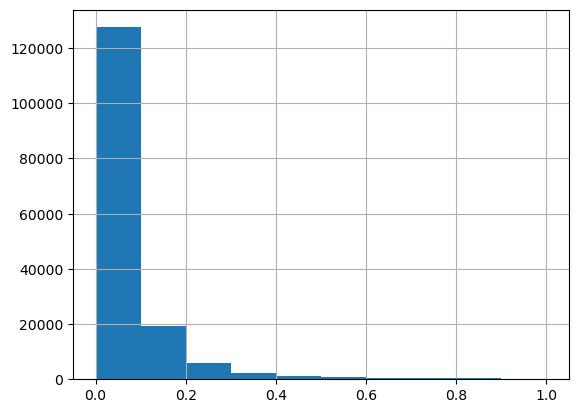

In [ ]:
scaled_df["comment_length"].hist()

In [ ]:
# Count Vectorizer
cv = CountVectorizer(decode_error="ignore", strip_accents="unicode", lowercase=True,
                     analyzer="word", min_df=10, max_features=None, ngram_range=(1, 3))
 # I would have to scale them anyway

In [ ]:
X_train = X_train.reset_index()

In [ ]:
X_train

,index,comment_text,comment_length,sentence_count,count_word,count_unique_word,count_letters
0,103667,it.The using of bots is no excuse .,37,3,8,8,35
1,42919,Fuck Wikipedia and fuck all the leftist libera...,122,1,21,21,122
2,5027,just so you know you are threating me and me a...,434,4,80,57,428
3,45990,A Wikipedia stud muffin Where is that coming f...,125,2,25,24,125
4,112755,Your opinions and presence is neither wanted n...,147,2,28,26,147
...,...,...,...,...,...,...,...
110891,140137,Welcome happy editing .,23,2,4,4,23
110892,125955,According to the National Post Magnotta.identi...,206,6,28,22,196
110893,54154,Do not worry about it.This was addressed to so...,106,3,21,19,104
110894,23594,Ethnic Composition re person who replaced whit...,350,6,54,44,342


In [ ]:
# https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=25):
    '''
    Get top n TF-IDF values in the given row and return them with their corresponding feature names.

    Parameters:
    - row: TF-IDF values for a single document or row in the matrix
    - features: List of feature names or indices
    - top_n: Number of top TF-IDF values to retrieve

    Returns:
    - DataFrame containing the top n features with their TF-IDF values in the given row
    '''
    # Sort the TF-IDF values in descending order and retrieve indices of top n values
    topn_ids = np.argsort(row)[::-1][:top_n]

    # Retrieve the top n features along with their TF-IDF values using their indices
    top_feats = [(features[i], row[i]) for i in topn_ids]

    # Create a DataFrame with columns 'feature' and 'tfidf' containing the top features and TF-IDF values
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df


def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    '''
    Retrieve the top TF-IDF features in a specific document (matrix row).

    Parameters:
    - Xtr: Term-document matrix or TF-IDF transformed matrix
    - features: List of feature names or indices
    - row_id: Index of the specific row/document to extract top features from
    - top_n: Number of top TF-IDF features to retrieve

    Returns:
    - DataFrame containing the top n TF-IDF features in the specified document
    '''
    # Extract the TF-IDF values for the specified row/document and convert to a 1D array
    row = np.squeeze(Xtr[row_id].toarray())

    # Use the top_tfidf_feats function to retrieve the top n TF-IDF features for the document
    return top_tfidf_feats(row, features, top_n)


def top_mean_feats(Xtr, features, grp_ids, min_tfidf=0.1, top_n=25):
    '''
    Return the top n features that on average are most important amongst documents in rows
    identified by indices in grp_ids.

    Parameters:
    - Xtr: Term-document matrix or TF-IDF transformed matrix
    - features: List of feature names or indices
    - grp_ids: Indices of rows/documents corresponding to a specific group
    - min_tfidf: Minimum TF-IDF threshold for considering features
    - top_n: Number of top features to retrieve

    Returns:
    - Top n features that are most important on average among the specified documents
    '''

    # Extract the subset of rows/documents identified by grp_ids from the term-document matrix Xtr
    D = Xtr[grp_ids].toarray()

    # Filter out values in the subset matrix D that are less than the minimum TF-IDF threshold
    D[D < min_tfidf] = 0

    # Calculate the mean TF-IDF values across the subset of documents for each feature
    tfidf_means = np.mean(D, axis=0)

    # Retrieve the top n features with the highest mean TF-IDF values
    return top_tfidf_feats(tfidf_means, features, top_n)


# modified for multilabel milticlass
def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    '''
    Return a list of dataframes (dfs), where each dataframe holds top_n features and their mean tfidf value
    calculated across documents with the same class label.

    Parameters:
    - Xtr: Term-document matrix or TF-IDF transformed matrix
    - features: List of feature names or indices
    - min_tfidf: Minimum TF-IDF threshold for considering features
    - top_n: Number of top features to retrieve

    Returns:
    - dfs: List of dataframes, each containing top features and their mean TF-IDF for a specific class label
    '''
    dfs = []  # Initialize an empty list to store dataframes
    cols = y_train.columns  # Extract column names from train_tags dataframe (assuming train_tags is defined)

    for col in cols:
        # Extract indices corresponding to the current class label (assuming train_tags is a dataframe)
        ids = y_train.index[y_train[col] == 1]

        # Retrieve top features and their mean TF-IDF for the specific class label
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)

        # Assign label value (assuming label variable is defined)
        feats_df["label"] = col  # This line seems to be missing a variable 'label' assignment

        # Append the dataframe containing top features for the current class label to 'dfs' list
        dfs.append(feats_df)

    return dfs  # Return the list of dataframes, each corresponding to a class label

In [ ]:
# Tfidf transformer
tfv_unigrams =  TfidfVectorizer(min_df=150,  max_features=30000,
            strip_accents="unicode", analyzer="word", ngram_range=(1,1),
            use_idf=1, smooth_idf=1, sublinear_tf=1,
            stop_words = "english")

tfv_bigrams = TfidfVectorizer(min_df=150,  max_features=30000,
            strip_accents="unicode", analyzer="word", ngram_range=(2,2),
            use_idf=1, smooth_idf=1, sublinear_tf=1,
            stop_words = "english")

# Fitting TF-IDF to both training and validtion sets for detecting top unigram-based features
tfv_unigrams.fit(list(X_train["comment_text"]) + list(X_valid["comment_text"]))
Xtrain_tfv_uni =  tfv_unigrams.transform(X_train["comment_text"])
xvalid_tfv_uni = tfv_unigrams.transform(X_valid["comment_text"])

# Fitting TF-IDF to both training and validtion sets for detecting top bigram-based features
tfv_bigrams.fit(list(X_train["comment_text"]) + list(X_valid["comment_text"]))
Xtrain_tfv_bi =  tfv_bigrams.transform(X_train["comment_text"])
xvalid_tfv_bi = tfv_bigrams.transform(X_valid["comment_text"])

In [ ]:
with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /train_unigram_1.sav", "wb") as file:
    joblib.dump(Xtrain_tfv_uni, file, protocol=pickle.HIGHEST_PROTOCOL)

with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /valid_unigram_1.sav", "wb") as file:
    joblib.dump(xvalid_tfv_uni, file, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
Xtrain_tfv_uni = joblib.load("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /train_unigram_1.sav")
Xvalid_tfv_uni = joblib.load("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /valid_unigram_1.sav")

In [ ]:
with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /train_bigram_1.sav", "wb") as file:
    joblib.dump(Xtrain_tfv_bi, file, protocol=pickle.HIGHEST_PROTOCOL)

with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /valid_bigram_1.sav", "wb") as file:
    joblib.dump(xvalid_tfv_bi, file, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
Xtrain_tfv_bi = joblib.load("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /train_bigram_1.sav")
Xvalid_tfv_bi = joblib.load("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /valid_bigram_1.sav")

In [ ]:
# Note: Run this cell later
features_uni = np.array(tfv_unigrams.get_feature_names_out())
tfidf_topn_unigrams_per_class = top_feats_by_class(Xtrain_tfv_uni, features_uni)

features_bi = np.array(tfv_bigrams.get_feature_names_out())
tfidf_topn_bigrams_per_class = top_feats_by_class(Xtrain_tfv_bi, features_bi)

In [ ]:
# Note: Run this cell later
# tfidf_topn_unigrams_per_class

[      feature     tfidf  label
 0        fuck  0.061785  toxic
 1     fucking  0.036187  toxic
 2        shit  0.027730  toxic
 3         ass  0.021054  toxic
 4      stupid  0.020466  toxic
 5        like  0.020270  toxic
 6       bitch  0.018665  toxic
 7        suck  0.018027  toxic
 8        stop  0.017616  toxic
 9   wikipedia  0.016256  toxic
 10       just  0.015930  toxic
 11        gay  0.015082  toxic
 12      idiot  0.015037  toxic
 13    asshole  0.014867  toxic
 14       dick  0.014274  toxic
 15       life  0.013972  toxic
 16       know  0.013401  toxic
 17     faggot  0.013248  toxic
 18       hell  0.012792  toxic
 19     people  0.012683  toxic,
     feature     tfidf         label
 0      fuck  0.192790  severe_toxic
 1   fucking  0.105771  severe_toxic
 2     bitch  0.063967  severe_toxic
 3      shit  0.059598  severe_toxic
 4       ass  0.050780  severe_toxic
 5      suck  0.045151  severe_toxic
 6   asshole  0.040615  severe_toxic
 7    faggot  0.039779  severe_

In [ ]:
# The feature matrix will become more and more sparse as I higher order n-gram based TFIDF features...
# But then do I need to extract all of those
# But wouldn't the no. of features vary? No its all filled with 0s anyway
# Extract char n-grams as well
tfv_ngrams = TfidfVectorizer(min_df=100,  max_features=30000,
            strip_accents='unicode', analyzer='char',ngram_range=(1,4),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and validtion sets for detecting top bigram-based features
tfv_ngrams.fit(list(X_train["comment_text"]) + list(X_valid["comment_text"]))
Xtrain_ngrams =  tfv_ngrams.transform(X_train["comment_text"])
Xvalid_ngrams = tfv_ngrams.transform(X_valid["comment_text"])

In [ ]:
# with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /train_ngrams_1.sav", "wb") as file:
#     joblib.dump(Xtrain_ngrams, file, protocol=pickle.HIGHEST_PROTOCOL)

# with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /valid_ngrams_1.sav", "wb") as file:
#     joblib.dump(Xvalid_ngrams, file, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
Xtrain_ngrams = joblib.load("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /train_ngrams_1.sav")
Xvalid_ngrams = joblib.load("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /valid_ngrams_1.sav")

In [ ]:
# features_ngrams = np.array(tfv_ngrams.get_feature_names_out())
# tfidf_topn_ngrams_per_class = top_feats_by_class(Xtrain_ngrams, features_ngrams)
# print(tfidf_topn_ngrams_per_class)

**Observations**
- The character n-grams don't seem nice

In [ ]:
scaled_data_train = scaled_data[X_train.index]
scaled_data_valid = scaled_data[X_valid.index]

In [ ]:
scaled_data_train

array([[0.04823461, 0.00632911, 0.02882483, 0.07641921, 0.04881953],
       [0.0175574 , 0.00632911, 0.00813008, 0.02401747, 0.0170068 ],
       [0.04534054, 0.00843882, 0.02956393, 0.07860262, 0.04581833],
       ...,
       [0.02315261, 0.00632911, 0.01478197, 0.03275109, 0.02320928],
       [0.04071001, 0.00843882, 0.02365115, 0.06331878, 0.04101641],
       [0.00945398, 0.0021097 , 0.00591279, 0.01746725, 0.00940376]])

In [ ]:
scaled_data_valid

array([[0.04823461, 0.00632911, 0.02882483, 0.07641921, 0.04881953],
       [0.0175574 , 0.00632911, 0.00813008, 0.02401747, 0.0170068 ],
       [0.04534054, 0.00843882, 0.02956393, 0.07860262, 0.04581833],
       ...,
       [0.04090295, 0.00843882, 0.02586844, 0.069869  , 0.04121649],
       [0.01832915, 0.        , 0.01330377, 0.0349345 , 0.0190076 ],
       [0.04553347, 0.00843882, 0.03030303, 0.06550218, 0.04601841]])

In [ ]:
from scipy.sparse import csr_matrix, hstack
# target_X_train =
target_X_train = hstack((Xtrain_tfv_uni, Xtrain_tfv_bi, scaled_data_train)).tocsr()
target_X_valid = hstack((Xvalid_tfv_uni, Xvalid_tfv_bi, scaled_data_valid)).tocsr()
# final_train_matrix = csr_matrix()

In [ ]:
# with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /target_Xtrain_1.sav", "wb") as file:
#     joblib.dump(target_X_train, file, protocol=pickle.HIGHEST_PROTOCOL)

# with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /target_Xvalid_1.sav", "wb") as file:
#     joblib.dump(target_X_valid, file, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
target_X_train = joblib.load("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /target_Xtrain_1.sav")
target_X_valid = joblib.load("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /target_Xvalid_1.sav")

## Data Resampling

---
## Workflow
- Linear Models
  - Logistic Regression
  - SGDClassifier  
  - ElasticNet Regression
  - PassiveAggressive Classifier
- Kernel-based models
  - Linear SVC
  - SVC
  - NuSVC
  - SpectralClustering???
- Non-parametric models
- Bayesian models
- Tree-based models
- Ensemble models
---

### Linear Models

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=seed_value)

In [ ]:
TARGET_COLS = y_train.columns

In [ ]:
print()

In [ ]:
y_train["toxic"]

0         0
1         1
2         0
3         0
4         0
         ..
110891    0
110892    0
110893    0
110894    0
110895    0
Name: toxic, Length: 110896, dtype: uint8

In [ ]:
from sklearn.metrics import log_loss, accuracy_score, classification_report

In [ ]:
train_loss, valid_loss = [], []
preds_train = np.zeros((X_train.shape[0], len(y_train)))
preds_valid = np.zeros((X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
    print('Class:= '+ label)
    lr_model.fit(target_X_train, y_train[label])

    preds_train[:, i] = lr_model.predict_proba(target_X_train)[:, 1]
    preds_valid[:, i] = lr_model.predict_proba(target_X_valid)[:, 1]

    train_loss_class = log_loss(y_train[label], preds_train[:, i])
    valid_loss_class = log_loss(y_valid[label], preds_valid[:, i])

    print('Trainloss=log loss:', train_loss_class)
    print('Validloss=log loss:', valid_loss_class)
    train_loss.append(train_loss_class)
    valid_loss.append(valid_loss_class)

Class:= toxic
Trainloss=log loss: 0.11656071483232597
Validloss=log loss: 0.13122520303933968
Class:= severe_toxic
Trainloss=log loss: 0.021937518169382858
Validloss=log loss: 0.028072150884148845
Class:= obscene
Trainloss=log loss: 0.06223473039404677
Validloss=log loss: 0.06824093506721057
Class:= threat
Trainloss=log loss: 0.009275411187587995
Validloss=log loss: 0.010165046458369213
Class:= insult
Trainloss=log loss: 0.07638672559853561
Validloss=log loss: 0.08577566556425982
Class:= identity_hate
Trainloss=log loss: 0.02354516224246501
Validloss=log loss: 0.027847455720955903


In [ ]:
# Logistic Regression with SGD Optimizer
# Refer this guide for more details: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(loss="log_loss", random_state=seed_value)

In [ ]:
train_loss, valid_loss = [], []
preds_train = np.zeros((X_train.shape[0], len(y_train)))
preds_valid = np.zeros((X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
    print('Class:= '+ label)
    sgd_model.fit(target_X_train, y_train[label])

    preds_train[:, i] = sgd_model.predict_proba(target_X_train)[:, 1]
    preds_valid[:, i] = sgd_model.predict_proba(target_X_valid)[:, 1]

    train_loss_class = log_loss(y_train[label], preds_train[:, i])
    valid_loss_class = log_loss(y_valid[label], preds_valid[:, i])

    print('Trainloss=log loss:', train_loss_class)
    print('Validloss=log loss:', valid_loss_class)
    train_loss.append(train_loss_class)
    valid_loss.append(valid_loss_class)

Class:= toxic
Trainloss=log loss: 0.1619176366718835
Validloss=log loss: 0.16766646766477916
Class:= severe_toxic
Trainloss=log loss: 0.03011117842603391
Validloss=log loss: 0.03331137314992982
Class:= obscene
Trainloss=log loss: 0.09166544561224037
Validloss=log loss: 0.0922037240998913
Class:= threat
Trainloss=log loss: 0.016608243599763393
Validloss=log loss: 0.015765850234028055
Class:= insult
Trainloss=log loss: 0.10179354247372699
Validloss=log loss: 0.10404217263198105
Class:= identity_hate
Trainloss=log loss: 0.034819065636308315
Validloss=log loss: 0.03588641794363383


In [ ]:
# Logistic Regression with ElasticNet regularization
lr_elastic_model = LogisticRegression(solver="saga", penalty="elasticnet", l1_ratio=0.5, random_state=seed_value)

In [ ]:
target_X_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.02882483, 0.07641921,
        0.04881953],
       [0.        , 0.        , 0.        , ..., 0.00813008, 0.02401747,
        0.0170068 ],
       [0.        , 0.        , 0.        , ..., 0.02956393, 0.07860262,
        0.04581833],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01478197, 0.03275109,
        0.02320928],
       [0.        , 0.        , 0.        , ..., 0.02365115, 0.06331878,
        0.04101641],
       [0.        , 0.        , 0.        , ..., 0.00591279, 0.01746725,
        0.00940376]])

In [ ]:
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,1,1,1,0,1,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
110891,0,0,0,0,0,0
110892,0,0,0,0,0,0
110893,0,0,0,0,0,0
110894,0,0,0,0,0,0


In [ ]:
pd.DataFrame(target_X_train.toarray())

In [ ]:
y_train["toxic"].isnull().sum()

0

In [ ]:
train_loss, valid_loss = [], []
preds_train = np.zeros((X_train.shape[0], len(y_train)))
preds_valid = np.zeros((X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
    print('Class:= '+ label)

    lr_elastic_model.fit(target_X_train, y_train[label])

    preds_train[:, i] = lr_elastic_model.predict_proba(target_X_train)[:, 1]
    preds_valid[:, i] = lr_elastic_model.predict_proba(target_X_valid)[:, 1]

    train_loss_class = log_loss(y_train[label], preds_train[:, i])
    valid_loss_class = log_loss(y_valid[label], preds_valid[:, i])

    print('Trainloss=log loss:', train_loss_class)
    print('Validloss=log loss:', valid_loss_class)
    train_loss.append(train_loss_class)
    valid_loss.append(valid_loss_class)

Class:= toxic
Trainloss=log loss: 0.11612141131604284
Validloss=log loss: 0.1297496378218577
Class:= severe_toxic
Trainloss=log loss: 0.022955228511477094
Validloss=log loss: 0.028446002949599813
Class:= obscene
Trainloss=log loss: 0.06298633442967096
Validloss=log loss: 0.06730965942403143
Class:= threat
Trainloss=log loss: 0.009730986364279626
Validloss=log loss: 0.010205125667703891
Class:= insult
Trainloss=log loss: 0.07767766315541984
Validloss=log loss: 0.08566386651865743
Class:= identity_hate
Trainloss=log loss: 0.024628781804509756
Validloss=log loss: 0.02790408002668809


In [ ]:
with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /train_feature_matrix_1.sav", "wb") as file:
    joblib.dump(target_X_train, file, protocol=pickle.HIGHEST_PROTOCOL)

with open("/content/drive/MyDrive/ML Case Studies /Toxic_Comment_Classifier /valid_feature_matrix_1.sav", "wb") as file:
    joblib.dump(target_X_valid, file, protocol=pickle.HIGHEST_PROTOCOL)

NameError: ignored

In [ ]:
# Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pa_model = PassiveAggressiveClassifier(random_state=seed_value)

In [ ]:
train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
    print('Class:= '+ label)

    pa_model.fit(target_X_train, y_train[label])

    preds_train[:, i] = pa_model.predict(target_X_train)
    preds_valid[:, i] = pa_model.predict(target_X_valid)

    train_loss_class = log_loss(y_train[label], preds_train[:, i])
    valid_loss_class = log_loss(y_valid[label], preds_valid[:, i])

    print('Trainloss=log loss:', train_loss_class)
    print('Validloss=log loss:', valid_loss_class)
    train_loss.append(train_loss_class)
    valid_loss.append(valid_loss_class)

Class:= toxic
Trainloss=log loss: 1.5051774531543207
Validloss=log loss: 1.8337693078646933
Class:= severe_toxic
Trainloss=log loss: 0.2333658845529698
Validloss=log loss: 0.3670572146428917
Class:= obscene
Trainloss=log loss: 0.6415936714590003
Validloss=log loss: 0.8410463864441462
Class:= threat
Trainloss=log loss: 0.044203008773264656
Validloss=log loss: 0.11603254925694731
Class:= insult
Trainloss=log loss: 0.9328134939652128
Validloss=log loss: 1.259673622979014
Class:= identity_hate
Trainloss=log loss: 0.18656269879304277
Validloss=log loss: 0.31169527937650515


---
### Kernel-based models

In [ ]:
from sklearn.svm import LinearSVC
linearsvc_model = LinearSVC(random_state=seed_value)

In [ ]:
train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
    print('Class:= '+ label)

    linearsvc_model.fit(target_X_train, y_train[label])

    preds_train[:, i] = linearsvc_model.predict(target_X_train)
    preds_valid[:, i] = linearsvc_model.predict(target_X_valid)

    train_loss_class = log_loss(y_train[label], preds_train[:, i])
    valid_loss_class = log_loss(y_valid[label], preds_valid[:, i])

    print('Trainloss=log loss:', train_loss_class)
    print('Validloss=log loss:', valid_loss_class)
    train_loss.append(train_loss_class)
    valid_loss.append(valid_loss_class)

Class:= toxic
Trainloss=log loss: 1.3917447321111642
Validloss=log loss: 1.5766775810796927
Class:= severe_toxic
Trainloss=log loss: 0.24636676948628286
Validloss=log loss: 0.3412722036969034
Class:= obscene
Trainloss=log loss: 0.6370433617323407
Validloss=log loss: 0.7386647253350752
Class:= threat
Trainloss=log loss: 0.06305429192656861
Validloss=log loss: 0.09252268633560508
Class:= insult
Trainloss=log loss: 0.9003112816319303
Validloss=log loss: 1.0556686834357543
Class:= identity_hate
Trainloss=log loss: 0.21873988900299257
Validloss=log loss: 0.28591026843051687


In [ ]:
# Assuming preds_train and preds_valid are the predictions for each label
for i, label in enumerate(TARGET_COLS):
    print('Class:= '+ label)

    # Your existing code here
    # Add your code here

    # Calculate accuracy score for train set
    train_accuracy = accuracy_score(y_train[label], preds_train[:, i])
    print('Train Accuracy:', train_accuracy)

    # Generate classification report for train set
    train_classification_report = classification_report(
        y_train[label], preds_train[:, i]
    )
    print('Train Classification Report:')
    print(train_classification_report)

    # Calculate accuracy score for validation set
    valid_accuracy = accuracy_score(y_valid[label], preds_valid[:, i])
    print('Validation Accuracy:', valid_accuracy)

    # Generate classification report for validation set
    valid_classification_report = classification_report(
        y_valid[label], preds_valid[:, i]
    )
    print('Validation Classification Report:')
    print(valid_classification_report)

Class:= toxic
Train Accuracy: 0.9613872457076901
Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    100653
           1       0.90      0.65      0.76     10243

    accuracy                           0.96    110896
   macro avg       0.93      0.82      0.87    110896
weighted avg       0.96      0.96      0.96    110896

Validation Accuracy: 0.9562564437056831
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43051
           1       0.87      0.63      0.73      4476

    accuracy                           0.96     47527
   macro avg       0.92      0.81      0.85     47527
weighted avg       0.95      0.96      0.95     47527

Class:= severe_toxic
Train Accuracy: 0.9931647669888904
Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    109922


### K-Nearest Neighbors Classifier

In [ ]:
# provisional value of K
PROVISIONAL_VALUE = np.sqrt(target_X_train.shape[0])
np.sqrt(PROVISIONAL_VALUE)

18.248575570291607

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=19)

In [ ]:
train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
    print('Class:= '+ label)

    knn_model.fit(target_X_train, y_train[label])

    preds_train[:, i] = knn_model.predict(target_X_train)
    preds_valid[:, i] = knn_model.predict(target_X_valid)

    train_loss_class = log_loss(y_train[label], preds_train[:, i])
    valid_loss_class = log_loss(y_valid[label], preds_valid[:, i])

    print('Trainloss=log loss:', train_loss_class)
    print('Validloss=log loss:', valid_loss_class)
    train_loss.append(train_loss_class)
    valid_loss.append(valid_loss_class)

Class:= toxic


### Bayesian Classifiers

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB, MultinomialNB

In [ ]:
train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
  print("Class:=" + label)

  BernoulliNB().fit(target_X_train, y_train[label])

  print(f"{(cross_val_score(bernoulli_clf, target_X_train, y_train[label], cv=5, scoring='f1').mean())*100} % f1-score")
  print(f"{(cross_val_score(bernoulli_clf, target_X_train, y_train[label], cv=5, scoring='accuracy').mean())*100} % Accuracy")

In [ ]:
train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
  print("Class:=" + label)

  ComplementNB().fit(target_X_train, y_train[label])

  print(f"{(cross_val_score(bernoulli_clf, target_X_train, y_train[label], cv=5, scoring='f1').mean())*100} % f1-score")
  print(f"{(cross_val_score(bernoulli_clf, target_X_train, y_train[label], cv=5, scoring='accuracy').mean())*100} % Accuracy")

In [ ]:
train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
  print("Class:=" + label)

  GaussianNB().fit(target_X_train, y_train[label])

  print(f"{(cross_val_score(bernoulli_clf, target_X_train, y_train[label], cv=5, scoring='f1').mean())*100} % f1-score")
  print(f"{(cross_val_score(bernoulli_clf, target_X_train, y_train[label], cv=5, scoring='accuracy').mean())*100} % Accuracy")

In [ ]:
train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
  print("Class:=" + label)

  MultinomialNB().fit(target_X_train, y_train[label])

  print(f"{(cross_val_score(bernoulli_clf, target_X_train, y_train[label], cv=5, scoring='f1').mean())*100} % f1-score")
  print(f"{(cross_val_score(bernoulli_clf, target_X_train, y_train[label], cv=5, scoring='accuracy').mean())*100} % Accuracy")

In [ ]:
train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
    print('Class:= '+ label)

    BernoulliNB().fit(target_X_train, y_train[label])

    preds_train[:, i] = knn_model.predict(target_X_train)
    preds_valid[:, i] = knn_model.predict(target_X_valid)

    train_loss_class = log_loss(y_train[label], preds_train[:, i])
    valid_loss_class = log_loss(y_valid[label], preds_valid[:, i])

    print('Trainloss=log loss:', train_loss_class)
    print('Validloss=log loss:', valid_loss_class)
    train_loss.append(train_loss_class)
    valid_loss.append(valid_loss_class)

### Tree-based classifier

**Decision Tree** baseline

In [ ]:
from sklearn.tree import DecisionTreeClassifier

train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
  print("Class:=" + label)

  DecisionTreeClassifier().fit(target_X_train, y_train[label])
  print(f"{(cross_val_score(DecisionTreeClassifier(), target_X_train, y_train[label], cv=5, scoring='f1').mean())*100} % f1-score")
  print(f"{(cross_val_score(DecisionTreeClassifier(), target_X_train, y_train[label], cv=5, scoring='accuracy').mean())*100} % Accuracy")

**Extra Tree** baseline

In [ ]:
from sklearn.tree import ExtraTreeClassifier

train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
  print("Class:=" + label)

  ExtraTreeClassifier().fit(target_X_train, y_train[label])
  print(f"{(cross_val_score(ExtraTreeClassifier(), target_X_train, y_train[label], cv=5, scoring='f1').mean())*100} % f1-score")
  print(f"{(cross_val_score(ExtraTreeClassifier(), target_X_train, y_train[label], cv=5, scoring='accuracy').mean())*100} % Accuracy")

### Ensemble models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
  print("Class:=" + label)

  RandomForestClassifier().fit(target_X_train, y_train[label])
  print(f"{(cross_val_score(RandomForestClassifier(), target_X_train, y_train[label], cv=5, scoring='f1').mean())*100} % f1-score")
  print(f"{(cross_val_score(RandomForestClassifier(), target_X_train, y_train[label], cv=5, scoring='accuracy').mean())*100} % Accuracy")

### Boosting Algorithms

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
adb_clf = AdaBoostClassifier(random_state=seed_value)

train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
  print("Class:=" + label)
  AdaBoostClassifier(random_state=seed_value).fit(target_X_train, y_train[label])
  print(f"{(cross_val_score(ExtraTreeClassifier(), target_X_train, y_train[label], cv=5, scoring='f1').mean())*100} % f1-score")
  print(f"{(cross_val_score(ExtraTreeClassifier(), target_X_train, y_train[label], cv=5, scoring='accuracy').mean())*100} % Accuracy")

In [ ]:
# GBM
train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
  print("Class:=" + label)
  GradientBoostingClassifier(random_state=seed_value).fit(target_X_train, y_train[label])
  print(f"{(cross_val_score(ExtraTreeClassifier(), target_X_train, y_train[label], cv=5, scoring='f1').mean())*100} % f1-score")
  print(f"{(cross_val_score(ExtraTreeClassifier(), target_X_train, y_train[label], cv=5, scoring='accuracy').mean())*100} % Accuracy")

In [ ]:
# HistGBM
train_loss, valid_loss = [], []
preds_train = np.zeros((target_X_train.shape[0], len(y_train)))
preds_valid = np.zeros((target_X_valid.shape[0], len(y_valid)))

for i, label in enumerate(TARGET_COLS):
  print("Class:=" + label)
  HistGradientBoostingClassifier(random_state=seed_value).fit(target_X_train, y_train[label])
  print(f"{(cross_val_score(ExtraTreeClassifier(), target_X_train, y_train[label], cv=5, scoring='f1').mean())*100} % f1-score")
  print(f"{(cross_val_score(ExtraTreeClassifier(), target_X_train, y_train[label], cv=5, scoring='accuracy').mean())*100} % Accuracy")

In [ ]:
# XGBoost
# I suspect it would be slow AND not fast enough

In [ ]:
!pip install detoxify

In [ ]:
from detoxify import Detoxify

In [ ]:
list(train_df["comment_text"])

In [ ]:
results = Detoxify("unbiased").predict(list(train_df["comment_text"]))

NameError: name 'Detoxify' is not defined

In [ ]:
test_df

NameError: name 'test_df' is not defined

In [ ]:
from multiprocessing import Pool
from detoxify import Detoxify

# Load the model
model = Detoxify('unbiased')

In [ ]:
# Function to make predictions using the model
def make_prediction(comment):
    return model.predict(comment)

# Number of parallel processes (adjust as needed)
num_processes = 4

# Split the comments into chunks for parallel processing
comments_chunks = [list(chunk) for chunk in np.array_split(train_df["comment_text"], num_processes)]

results = make_prediction(comments_chunks[0])
# Initialize a pool of processes
with Pool(num_processes) as pool:
  for chunk in range(len(comments_chunks)):
    # Make predictions in parallel using map
    results = pool.map(make_prediction, chunk)

NameError: name 'np' is not defined

In [ ]:
len(comments_chunks[0])

39608

In [ ]:
comments_chunks[0]

In [ ]:
from transformers import pipeline, RobertaTokenizer, RobertaForSequenceClassification

# Load the

In [ ]:
# Credits to AlexSanchez https://www.kaggle.com/jhoward/nb-svm-strong-linear-baseline-eda-0-052-lb#261316
# Custom Naive Byes Logistic Regression/Support Vector Classifier
class NbLogisticClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, C=1.0, dual=False, n_jobs=-1):
        self.C = C
        self.dual = dual
        self.n_jobs = n_jobs

    def fit(self, X, y):
        # Verify that the model has been fit

        # Check if X and y have correct shape
        y = y.values
        X, y = check_X_y(X, y, accept_sparse=True)

        def pr(X, y_i, y):
            """
            Calculate the probability distribution of features given a specific class y_i.

            Args:
            - X: Matrix of features (rows represent samples, columns represent features)
            - y_i: The specific class for which the probability distribution is calculated
            - y: The labels corresponding to the classes

            Returns:
            - Probability distribution of features for the specified class y_i
            """
            # Select rows from X where y equals y_i and sum them along axis 0
            p = X[y == y_i].sum(0)

            # Calculate and return the probability with Laplace smoothing
            return (p + 1) / ((y == y_i).sum() + 1)

        def calculate_nb_weights(X, y):
            """
            Perform Naive Bayes feature transformation on the input data.

            Args:
            - X: Matrix of features (rows represent samples, columns represent features)
            - y: The labels corresponding to the classes

            Returns:
            - Transformed matrix of features using Naive Bayes weights
            """
            # Calculate the log ratio of probabilities and create a sparse matrix
            log_ratio = np.log(pr(X, 1, y)) / np.log(pr(X, 0, y))
            self._r = sparse.csr_matrix(log_ratio)

            # Element-wise multiplication of X and the computed sparse matrix _r
            X_nb = X.multiply(self._r)
            return X_nb

        self._clf = LogisticRegression(C=self.C, dual=self.dual, n_jobs=self.n_jobs).fit(calculate_nb_weights(X, y), y)
        return self

    def predict(self, X, y):
        """
        Fit the model to the training data

        Args:
        - X: Training features
        - y: Target labels

        Returns
        - Fitted classifier

        """
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict(X.multiply(self._r))

    def predict_proba(self, X):

        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict_proba(X.multiply(self._r))


class NbSVCClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, C=1.0, dual=False, random_state=42):
        self.C = C
        self.dual = dual
        self.random_state = random_state

    def fit(self, X, y):
        # Verify that the model has been fit

        # Check if X and y have correct shape
        y = y.values
        X, y = check_X_y(X, y, accept_sparse=True)

        def pr(X, y_i, y):
            """
            Calculate the probability distribution of features given a specific class y_i.

            Args:
            - X: Matrix of features (rows represent samples, columns represent features)
            - y_i: The specific class for which the probability distribution is calculated
            - y: The labels corresponding to the classes

            Returns:
            - Probability distribution of features for the specified class y_i
            """
            # Select rows from X where y equals y_i and sum them along axis 0
            p = X[y == y_i].sum(0)

            # Calculate and return the probability with Laplace smoothing
            return (p + 1) / ((y == y_i).sum() + 1)

        def calculate_nb_weights(X, y):
            """
            Perform Naive Bayes feature transformation on the input data.

            Args:
            - X: Matrix of features (rows represent samples, columns represent features)
            - y: The labels corresponding to the classes

            Returns:
            - Transformed matrix of features using Naive Bayes weights
            """
            # Calculate the log ratio of probabilities and create a sparse matrix
            log_ratio = np.log(pr(X, 1, y)) / np.log(pr(X, 0, y))
            self._r = sparse.csr_matrix(log_ratio)

            # Element-wise multiplication of X and the computed sparse matrix _r
            X_nb = X.multiply(self._r)
            return X_nb

        self._clf = LinearSVC(C=self.C, dual=self.dual, random_state=self.random_state).fit(calculate_nb_weights(X, y), y)
        return self

    def predict(self, X, y):
        """
        Fit the model to the training data

        Args:
        - X: Training features
        - y: Target labels

        Returns
        - Fitted classifier

        """
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict(X.multiply(self._r))

    def predict_proba(self, X):

        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict_proba(X.multiply(self._r))

# Set the target columns

In [ ]:
selected_cols = ["count_sent", "count_word", "count_unique_word", "count_letters",
                 "count_punctuations", "count_words_upper", "count_words_title",
                 "count_words_title", "count_stopwords", "mean_word_len", "word_unique_percent",
                 "punct_percent"]
target_X = train_feats[selected_cols]

target_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
target_y = train_tags[]

NameError: name 'train_feats' is not defined

In [ ]:
taarget_X = train_spare.transpose()
target_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
target_y = train[target_cols]

In [ ]:
del(train_sparse)
gc.collect()

In [ ]:
model_1 = NbLogisticClassifier(C=4, dual=True, n_jobs=-1)
X_train, X_valid, y_train, y_valid = train_test_split(target_X, target_y, test_size=0.33, random_state=2018)
train_loss, valid_loss = [], []
preds_train = np.zeros((X_train.shape[0], y_train.shape[1]))
preds_valid = np.zeros((X_valid.shape[0], y_train.shape[1]))
for i, j in enumerate(TARGET_COLS):

model_2 = NbSVCClassifier(C=4, dual=True)